In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import statistics
import math
import pandas_datareader as pdr
import plotly.express as px
import eventstudy as es

# Ploting
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from dataprep.eda import plot_correlation
import matplotlib.dates as mdates


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
from sklearn.metrics import r2_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning
from xgboost import XGBRegressor
import xgboost as xgb

# Machine Learning Algorithm
import tensorflow as tf 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

plt.style.use('ggplot')

In [7]:
df = pd.read_csv('E:/Projects/Projects - Loyal Analytics/Item-wise Export of Marine Products_2018-2023.csv')
df

Item Measurable Quantum Parameters    2018-19    2019-20  \
0    FROZEN SHRIMP        Q (in Million Tonnes):  614145.00  652253.00   
1    FROZEN SHRIMP              V (in Rs. Crore)   31800.51   34152.03   
2    FROZEN SHRIMP      $ (in US Dollar Million)    4610.59    4889.12   
3      FROZEN FISH        Q (in Million Tonnes):  338933.00  223318.00   
4      FROZEN FISH              V (in Rs. Crore)    4916.82    3610.01   
5      FROZEN FISH      $ (in US Dollar Million)     699.09     513.60   
6   FR CUTTLE FISH        Q (in Million Tonnes):   60210.00   70906.00   
7   FR CUTTLE FISH              V (in Rs. Crore)    1975.97    2009.79   
8   FR CUTTLE FISH      $ (in US Dollar Million)     282.29     286.40   
9         FR SQUID        Q (in Million Tonnes):  101101.00   87631.00   
10        FR SQUID              V (in Rs. Crore)    2506.99    2196.59   
11        FR SQUID      $ (in US Dollar Million)     359.71     314.23   
12      DRIED ITEM        Q (in Million Tonnes):   95296.00   84417.00   
13      DRIED ITEM              V (in Rs. Crore)    1323.45     981.50   
14      DRIED ITEM      $ (in US Dollar Million)     189.58     140.81   
15      LIVE ITEMS        Q (in Million Tonnes):   10179.00    7287.00   
16      LIVE ITEMS              V (in Rs. Crore)     388.88     324.26   
17      LIVE ITEMS      $ (in US Dollar Million)      55.89      46.43   
18   CHILLED ITEMS        Q (in Million Tonnes):   17207.00   21202.00   
19   CHILLED ITEMS              V (in Rs. Crore)     616.22     631.84   
20   CHILLED ITEMS      $ (in US Dollar Million)      89.20      90.34   
21          OTHERS        Q (in Million Tonnes):  155487.00  142638.00   
22          OTHERS              V (in Rs. Crore)    3060.53    2756.84   
23          OTHERS      $ (in US Dollar Million)     442.16     397.77   

      2020-21    2021-22    2022-23  
0   590275.00  728123.00  711099.00  
1    32520.29   42706.04   43135.58  
2     4426.19    5828.59    5481.63  
3   188130.00  226586.00  368549.00  
4     2941.65    3471.91    5503.18  
5      402.31     471.45     687.05  
6    59292.00   58992.00   54919.00  
7     1626.34    2062.63    2353.34  
8      221.97     280.08     295.49  
9    61176.00   75750.00   83846.00  
10    1998.90    2806.09    3593.75  
11     273.37     383.37     454.61  
12   85661.00   73679.00  252918.00  
13    1148.38    1472.98    3080.92  
14     156.94     143.46     384.05  
15    4379.00    7032.00    7824.00  
16     239.69     353.36     440.06  
17      32.72      47.98      55.47  
18   17622.00   21689.00   24428.00  
19     477.99     733.47     616.29  
20      65.14      63.92      77.17  
21  142975.00  177414.00  231703.00  
22    2767.74    3979.99    5246.03  
23     378.30     540.73     658.84

In [213]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Year': ['2018-19', '2019-20', '2020-21', '2021-22', '2021-22'],
    'FROZEN SHRIMP Q (in Million Tonnes)': [614145, 652253, 590275, 728123, 711099],
    'FROZEN SHRIMP V (in Rs. Crore)': [31800.51, 34152.03, 32520.29, 42706.04, 43135.58],
    'FROZEN SHRIMP $ (in US Dollar Million)': [4610.59, 4889.12, 4426.19, 5828.59, 5481.63],
    'FROZEN FISH Q (in Million Tonnes)': [338933, 223318, 188130, 226586, 368549],
    'FROZEN FISH V (in Rs. Crore)': [4916.82, 3610.01, 2941.65, 3471.91, 5503.18],
    'FROZEN FISH $ (in US Dollar Million)': [699.09, 513.60, 402.31, 471.45, 687.05],
    'FR CUTTLE FISH Q (in Million Tonnes)': [60210, 70906, 59292, 58992, 54919],
    'FR CUTTLE FISH V (in Rs. Crore)': [1975.97, 2009.97, 1626.34, 2062.63, 2353.34],
    'FR CUTTLE FISH $ (in US Dollar Million)': [282.29, 286.40, 221.97, 280.08, 295.49],
    'FR SQUID Q (in Million Tonnes)': [101101, 87631, 61176, 75750, 83846],
    'FR SQUID FISH V (in Rs. Crore)': [2506.99, 2196.59, 1998.90, 2806.09, 3593.75],
    'FR SQUID FISH $ (in US Dollar Million)': [359.71, 314.23, 273.37, 383.37, 454.61],
    'DRIED ITEM Q (in Million Tonnes)': [95296, 84417, 85661, 73679, 252918],
    'DRIED ITEM V (in Rs. Crore)': [1323.45, 981.50, 1148.38, 1472.98, 3080.92],
    'DRIED ITEM $ (in US Dollar Million)': [189.58, 140.81, 156.94, 143.46, 384.05],
    'LIVE ITEMS Q (in Million Tonnes)': [10179, 7287, 4379, 7032, 7824],
    'LIVE ITEMS V (in Rs. Crore)': [388.88, 324.26, 239.69, 353.36, 440.06],
    'LIVE ITEMS $ (in US Dollar Million)': [55.89, 46.43, 32.72, 47.98, 55.47],
    'CHILLED ITEMS Q (in Million Tonnes)': [17207, 21202, 17622, 21689, 24428],
    'CHILLED ITEMS V (in Rs. Crore)': [616.22, 631.84, 477.99, 733.47, 616.29],
    'CHILLED ITEMS $ (in US Dollar Million)': [89.20, 90.34, 65.14, 63.92, 77.17],
    'OTHERS Q (in Million Tonnes)': [155487, 142638, 142975, 177414, 231703],
    'OTHERS V (in Rs. Crore)': [3060.53, 2756.84, 2767.74, 3979.99, 5246.03],
    'OTHERS $ (in US Dollar Million)': [442.16, 397.77, 378.30, 540.73, 658.84],
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Transpose the DataFrame
transposed_df = df.T

# Rename the columns
transposed_df.columns = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# Drop the first row
transposed_df = transposed_df.iloc[1:]

# Display the transposed DataFrame
transposed_df

2018-19   2019-20   2020-21  \
FROZEN SHRIMP Q (in Million Tonnes)        614145    652253    590275   
FROZEN SHRIMP V (in Rs. Crore)           31800.51  34152.03  32520.29   
FROZEN SHRIMP $ (in US Dollar Million)    4610.59   4889.12   4426.19   
FROZEN FISH Q (in Million Tonnes)          338933    223318    188130   
FROZEN FISH V (in Rs. Crore)              4916.82   3610.01   2941.65   
FROZEN FISH $ (in US Dollar Million)       699.09     513.6    402.31   
FR CUTTLE FISH Q (in Million Tonnes)        60210     70906     59292   
FR CUTTLE FISH V (in Rs. Crore)           1975.97   2009.97   1626.34   
FR CUTTLE FISH $ (in US Dollar Million)    282.29     286.4    221.97   
FR SQUID Q (in Million Tonnes)             101101     87631     61176   
FR SQUID FISH V (in Rs. Crore)            2506.99   2196.59    1998.9   
FR SQUID FISH $ (in US Dollar Million)     359.71    314.23    273.37   
DRIED ITEM Q (in Million Tonnes)            95296     84417     85661   
DRIED ITEM V (in Rs. Crore)               1323.45     981.5   1148.38   
DRIED ITEM $ (in US Dollar Million)        189.58    140.81    156.94   
LIVE ITEMS Q (in Million Tonnes)            10179      7287      4379   
LIVE ITEMS V (in Rs. Crore)                388.88    324.26    239.69   
LIVE ITEMS $ (in US Dollar Million)         55.89     46.43     32.72   
CHILLED ITEMS Q (in Million Tonnes)         17207     21202     17622   
CHILLED ITEMS V (in Rs. Crore)             616.22    631.84    477.99   
CHILLED ITEMS $ (in US Dollar Million)       89.2     90.34     65.14   
OTHERS Q (in Million Tonnes)               155487    142638    142975   
OTHERS V (in Rs. Crore)                   3060.53   2756.84   2767.74   
OTHERS $ (in US Dollar Million)            442.16    397.77     378.3   

                                          2021-22   2022-23  
FROZEN SHRIMP Q (in Million Tonnes)        728123    711099  
FROZEN SHRIMP V (in Rs. Crore)           42706.04  43135.58  
FROZEN SHRIMP $ (in US Dollar Million)    5828.59   5481.63  
FROZEN FISH Q (in Million Tonnes)          226586    368549  
FROZEN FISH V (in Rs. Crore)              3471.91   5503.18  
FROZEN FISH $ (in US Dollar Million)       471.45    687.05  
FR CUTTLE FISH Q (in Million Tonnes)        58992     54919  
FR CUTTLE FISH V (in Rs. Crore)           2062.63   2353.34  
FR CUTTLE FISH $ (in US Dollar Million)    280.08    295.49  
FR SQUID Q (in Million Tonnes)              75750     83846  
FR SQUID FISH V (in Rs. Crore)            2806.09   3593.75  
FR SQUID FISH $ (in US Dollar Million)     383.37    454.61  
DRIED ITEM Q (in Million Tonnes)            73679    252918  
DRIED ITEM V (in Rs. Crore)               1472.98   3080.92  
DRIED ITEM $ (in US Dollar Million)        143.46    384.05  
LIVE ITEMS Q (in Million Tonnes)             7032      7824  
LIVE ITEMS V (in Rs. Crore)                353.36    440.06  
LIVE ITEMS $ (in US Dollar Million)         47.98     55.47  
CHILLED ITEMS Q (in Million Tonnes)         21689     24428  
CHILLED ITEMS V (in Rs. Crore)             733.47    616.29  
CHILLED ITEMS $ (in US Dollar Million)      63.92     77.17  
OTHERS Q (in Million Tonnes)               177414    231703  
OTHERS V (in Rs. Crore)                   3979.99   5246.03  
OTHERS $ (in US Dollar Million)            540.73    658.84

# Exploratory Data Analysis

In [5]:
# Structure/Details regarding the imported Data-file(s) ---

type(transposed_df)

pandas.core.frame.DataFrame

In [6]:
transposed_df.shape

(24, 5)

In [7]:
transposed_df.dtypes

2018-19    object
2019-20    object
2020-21    object
2021-22    object
2022-23    object
dtype: object

In [8]:
transposed_df.columns

Index(['2018-19', '2019-20', '2020-21', '2021-22', '2022-23'], dtype='object')

In [214]:
# Conversion of variable names to date values---

# Sample DataFrame with columns as years
# df = pd.DataFrame(columns=['2018-19', '2019-20', '2020-21', '2021-22', '2022-23'])

# Define the corresponding date values
date_values = ['2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01', '2022-09-01']

# Rename the columns with date values
transposed_df.columns = pd.to_datetime(date_values)

# Print the DataFrame with updated column names
transposed_df

2018-09-01 2019-09-01 2020-09-01  \
FROZEN SHRIMP Q (in Million Tonnes)         614145     652253     590275   
FROZEN SHRIMP V (in Rs. Crore)            31800.51   34152.03   32520.29   
FROZEN SHRIMP $ (in US Dollar Million)     4610.59    4889.12    4426.19   
FROZEN FISH Q (in Million Tonnes)           338933     223318     188130   
FROZEN FISH V (in Rs. Crore)               4916.82    3610.01    2941.65   
FROZEN FISH $ (in US Dollar Million)        699.09      513.6     402.31   
FR CUTTLE FISH Q (in Million Tonnes)         60210      70906      59292   
FR CUTTLE FISH V (in Rs. Crore)            1975.97    2009.97    1626.34   
FR CUTTLE FISH $ (in US Dollar Million)     282.29      286.4     221.97   
FR SQUID Q (in Million Tonnes)              101101      87631      61176   
FR SQUID FISH V (in Rs. Crore)             2506.99    2196.59     1998.9   
FR SQUID FISH $ (in US Dollar Million)      359.71     314.23     273.37   
DRIED ITEM Q (in Million Tonnes)             95296      84417      85661   
DRIED ITEM V (in Rs. Crore)                1323.45      981.5    1148.38   
DRIED ITEM $ (in US Dollar Million)         189.58     140.81     156.94   
LIVE ITEMS Q (in Million Tonnes)             10179       7287       4379   
LIVE ITEMS V (in Rs. Crore)                 388.88     324.26     239.69   
LIVE ITEMS $ (in US Dollar Million)          55.89      46.43      32.72   
CHILLED ITEMS Q (in Million Tonnes)          17207      21202      17622   
CHILLED ITEMS V (in Rs. Crore)              616.22     631.84     477.99   
CHILLED ITEMS $ (in US Dollar Million)        89.2      90.34      65.14   
OTHERS Q (in Million Tonnes)                155487     142638     142975   
OTHERS V (in Rs. Crore)                    3060.53    2756.84    2767.74   
OTHERS $ (in US Dollar Million)             442.16     397.77      378.3   

                                        2021-09-01 2022-09-01  
FROZEN SHRIMP Q (in Million Tonnes)         728123     711099  
FROZEN SHRIMP V (in Rs. Crore)            42706.04   43135.58  
FROZEN SHRIMP $ (in US Dollar Million)     5828.59    5481.63  
FROZEN FISH Q (in Million Tonnes)           226586     368549  
FROZEN FISH V (in Rs. Crore)               3471.91    5503.18  
FROZEN FISH $ (in US Dollar Million)        471.45     687.05  
FR CUTTLE FISH Q (in Million Tonnes)         58992      54919  
FR CUTTLE FISH V (in Rs. Crore)            2062.63    2353.34  
FR CUTTLE FISH $ (in US Dollar Million)     280.08     295.49  
FR SQUID Q (in Million Tonnes)               75750      83846  
FR SQUID FISH V (in Rs. Crore)             2806.09    3593.75  
FR SQUID FISH $ (in US Dollar Million)      383.37     454.61  
DRIED ITEM Q (in Million Tonnes)             73679     252918  
DRIED ITEM V (in Rs. Crore)                1472.98    3080.92  
DRIED ITEM $ (in US Dollar Million)         143.46     384.05  
LIVE ITEMS Q (in Million Tonnes)              7032       7824  
LIVE ITEMS V (in Rs. Crore)                 353.36     440.06  
LIVE ITEMS $ (in US Dollar Million)          47.98      55.47  
CHILLED ITEMS Q (in Million Tonnes)          21689      24428  
CHILLED ITEMS V (in Rs. Crore)              733.47     616.29  
CHILLED ITEMS $ (in US Dollar Million)       63.92      77.17  
OTHERS Q (in Million Tonnes)                177414     231703  
OTHERS V (in Rs. Crore)                    3979.99    5246.03  
OTHERS $ (in US Dollar Million)             540.73     658.84

In [215]:
transposed_df.columns

DatetimeIndex(['2018-09-01', '2019-09-01', '2020-09-01', '2021-09-01',
               '2022-09-01'],
              dtype='datetime64[ns]', freq=None)

In [216]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, FROZEN SHRIMP Q (in Million Tonnes) to OTHERS $ (in US Dollar Million)
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   2018-09-01 00:00:00  24 non-null     object
 1   2019-09-01 00:00:00  24 non-null     object
 2   2020-09-01 00:00:00  24 non-null     object
 3   2021-09-01 00:00:00  24 non-null     object
 4   2022-09-01 00:00:00  24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [217]:
df = transposed_df.apply(pd.to_numeric)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, FROZEN SHRIMP Q (in Million Tonnes) to OTHERS $ (in US Dollar Million)
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   2018-09-01 00:00:00  24 non-null     float64
 1   2019-09-01 00:00:00  24 non-null     float64
 2   2020-09-01 00:00:00  24 non-null     float64
 3   2021-09-01 00:00:00  24 non-null     float64
 4   2022-09-01 00:00:00  24 non-null     float64
dtypes: float64(5)
memory usage: 1.1+ KB


In [14]:
# Export the DataFrame to a CSV file
df.to_csv('transposed.csv', index=False)

In [15]:
# To identify any Null values in the given dataset ---

df.isnull().values.any()

False

In [17]:
# OR ---

df.isnull().sum()

2018-09-01    0
2019-09-01    0
2020-09-01    0
2021-09-01    0
2022-09-01    0
dtype: int64

In [18]:
def eda(df):
    eda_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    eda_df['Unique_Values'] = df.nunique().values
    eda_df['Missing_Values'] = df.isna().sum()
    eda_df['%_of_Missing_Values'] = (df.isna().sum())/len(df)
    eda_df['count'] = df.count().values
    return eda_df

In [19]:
eda(df).style.background_gradient(cmap='Reds')

# Descriptive Statistics

In [20]:
df.describe()

2018-09-01     2019-09-01     2020-09-01     2021-09-01  \
count      24.000000      24.000000      24.000000      24.000000   
mean    60244.828333   55958.072500   49966.163333   59775.460417   
std    140422.728792  138635.702435  125172.618839  153834.112541   
min        55.890000      46.430000      32.720000      47.980000   
25%       428.840000     379.392500     352.067500     449.430000   
50%      2783.760000    2476.715000    2383.320000    3139.000000   
75%     38902.882500   43340.522500   39213.217500   46777.530000   
max    614145.000000  652253.000000  590275.000000  728123.000000   

          2022-09-01  
count      24.000000  
mean    75306.227500  
std    166253.064923  
min        55.470000  
25%       575.870000  
50%      4419.890000  
75%     46081.435000  
max    711099.000000

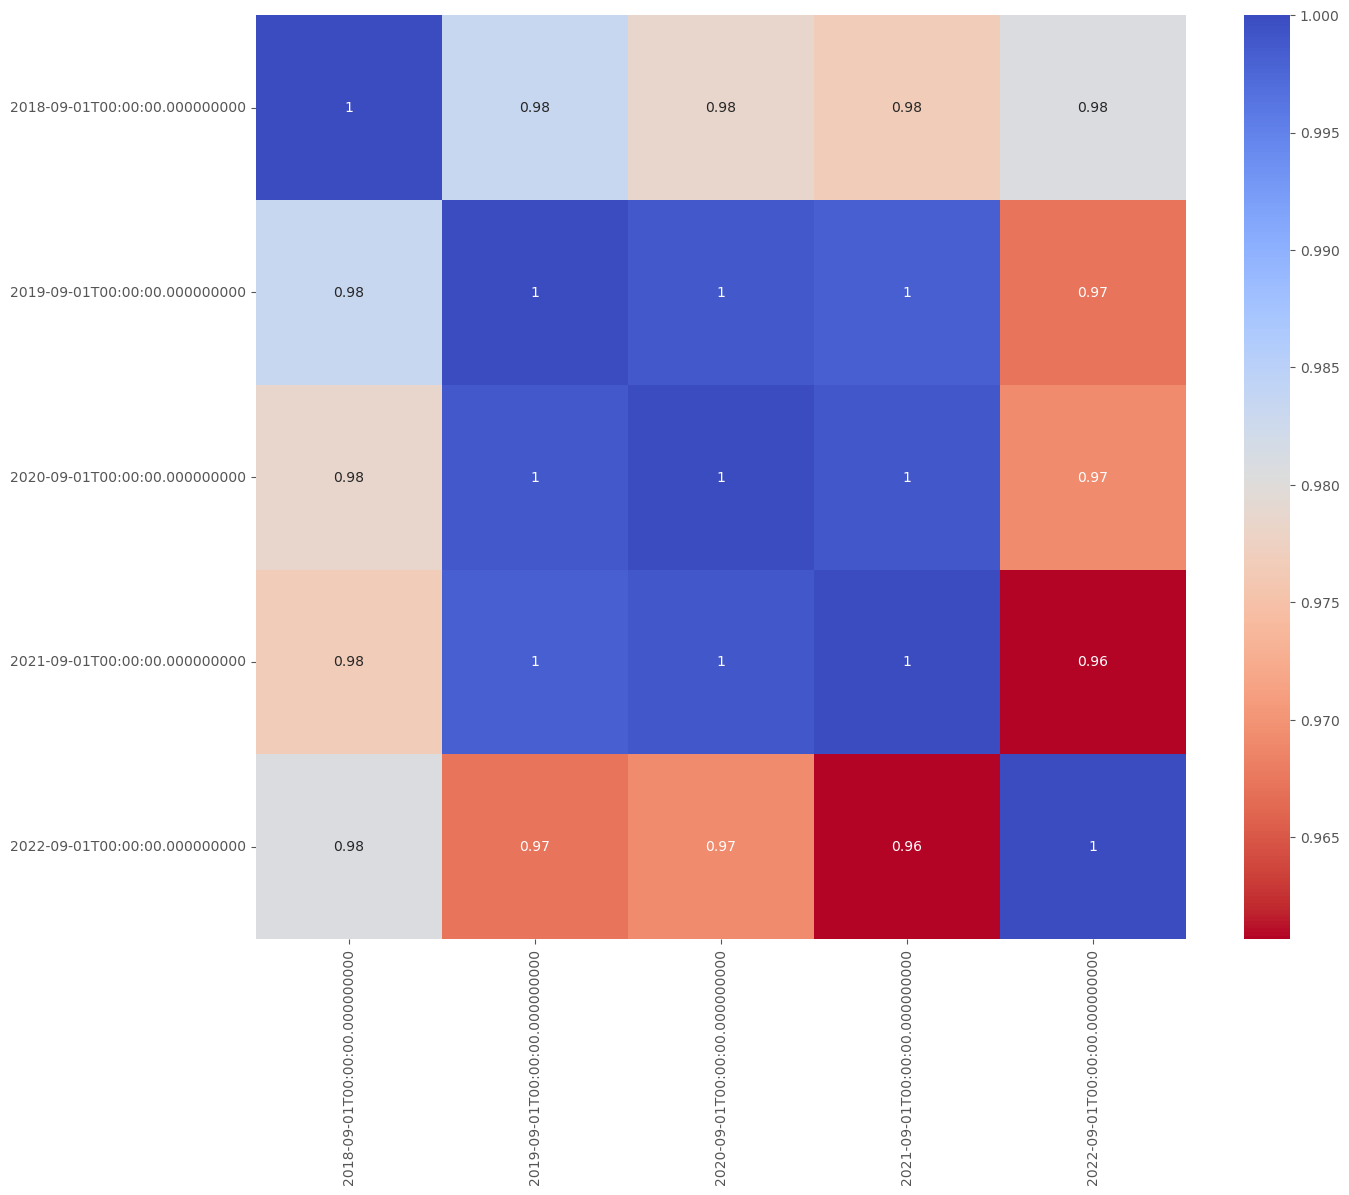

In [23]:
#  Heat Map/Correlogram ---

plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm_r", annot=True)
plt.show()


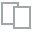
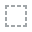
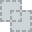
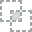
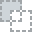
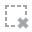
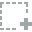
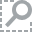
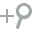
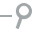
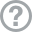
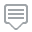
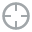
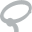
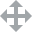
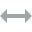
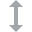
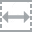
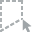
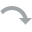
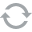
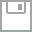
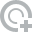
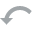
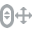
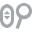
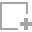
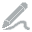
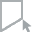
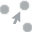
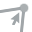
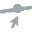

In [24]:
plot_correlation(df)

  0%|                                                                                          | 0/983 [00:00<…

DataPrep Report
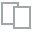
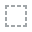
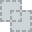
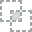
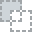
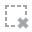
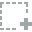
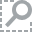
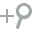
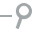
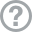
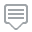
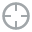
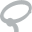
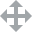
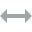
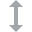
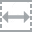
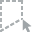
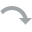
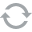
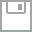
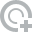
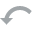
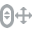
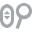
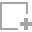
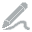
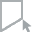
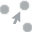
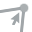
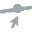

In [73]:
from dataprep.datasets import load_dataset
# importing function from DataPrep.eda
from dataprep.eda import create_report

create_report(df)

In [77]:
df = pd.DataFrame(df)
df

2018-09-01  2019-09-01  2020-09-01  \
FROZEN SHRIMP Q (in Million Tonnes)      614145.00   652253.00   590275.00   
FROZEN SHRIMP V (in Rs. Crore)            31800.51    34152.03    32520.29   
FROZEN SHRIMP $ (in US Dollar Million)     4610.59     4889.12     4426.19   
FROZEN FISH Q (in Million Tonnes)        338933.00   223318.00   188130.00   
FROZEN FISH V (in Rs. Crore)               4916.82     3610.01     2941.65   
FROZEN FISH $ (in US Dollar Million)        699.09      513.60      402.31   
FR CUTTLE FISH Q (in Million Tonnes)      60210.00    70906.00    59292.00   
FR CUTTLE FISH V (in Million Tonnes)       1975.97     2009.97     1626.34   
FR CUTTLE FISH $ (in Million Tonnes)        282.29      286.40      221.97   
FR SQUID Q (in Million Tonnes)           101101.00    87631.00    61176.00   
FR SQUID FISH V (in Million Tonnes)        2506.99     2196.59     1998.90   
FR SQUID FISH $ (in Million Tonnes)         359.71      314.23      273.37   
DRIED ITEM Q (in Million Tonnes)          95296.00    84417.00    85661.00   
DRIED ITEM V (in Million Tonnes)           1323.45      981.50     1148.38   
DRIED ITEM $ (in Million Tonnes)            189.58      140.81      156.94   
LIVE ITEMS Q (in Million Tonnes)          10179.00     7287.00     4379.00   
LIVE ITEMS V (in Million Tonnes)            388.88      324.26      239.69   
LIVE ITEMS $ (in Million Tonnes)             55.89       46.43       32.72   
CHILLED ITEMS Q (in Million Tonnes)       17207.00    21202.00    17622.00   
CHILLED ITEMS V (in Million Tonnes)         616.22      631.84      477.99   
CHILLED ITEMS $ (in Million Tonnes)          89.20       90.34       65.14   
OTHERS Q (in Million Tonnes)             155487.00   142638.00   142975.00   
OTHERS V (in Million Tonnes)               3060.53     2756.84     2767.74   
OTHERS $ (in Million Tonnes)                442.16      397.77      378.30   

                                        2021-09-01  2022-09-01  
FROZEN SHRIMP Q (in Million Tonnes)      728123.00   711099.00  
FROZEN SHRIMP V (in Rs. Crore)            42706.04    43135.58  
FROZEN SHRIMP $ (in US Dollar Million)     5828.59     5481.63  
FROZEN FISH Q (in Million Tonnes)        226586.00   368549.00  
FROZEN FISH V (in Rs. Crore)               3471.91     5503.18  
FROZEN FISH $ (in US Dollar Million)        471.45      687.05  
FR CUTTLE FISH Q (in Million Tonnes)      58992.00    54919.00  
FR CUTTLE FISH V (in Million Tonnes)       2062.63     2353.34  
FR CUTTLE FISH $ (in Million Tonnes)        280.08      295.49  
FR SQUID Q (in Million Tonnes)            75750.00    83846.00  
FR SQUID FISH V (in Million Tonnes)        2806.09     3593.75  
FR SQUID FISH $ (in Million Tonnes)         383.37      454.61  
DRIED ITEM Q (in Million Tonnes)          73679.00   252918.00  
DRIED ITEM V (in Million Tonnes)           1472.98     3080.92  
DRIED ITEM $ (in Million Tonnes)            143.46      384.05  
LIVE ITEMS Q (in Million Tonnes)           7032.00     7824.00  
LIVE ITEMS V (in Million Tonnes)            353.36      440.06  
LIVE ITEMS $ (in Million Tonnes)             47.98       55.47  
CHILLED ITEMS Q (in Million Tonnes)       21689.00    24428.00  
CHILLED ITEMS V (in Million Tonnes)         733.47      616.29  
CHILLED ITEMS $ (in Million Tonnes)          63.92       77.17  
OTHERS Q (in Million Tonnes)             177414.00   231703.00  
OTHERS V (in Million Tonnes)               3979.99     5246.03  
OTHERS $ (in Million Tonnes)                540.73      658.84

# Time-Series Algorithms ---

## a) Moving Averages ---

In [24]:
import pandas as pd

# Create a dictionary with the data
data = {
    'Year': ['2018-19', '2019-20', '2020-21', '2021-22', '2021-22'],
    'FROZEN SHRIMP Q (in Million Tonnes)': [614145, 652253, 590275, 728123, 711099],
    'FROZEN SHRIMP V (in Rs. Crore)': [31800.51, 34152.03, 32520.29, 42706.04, 43135.58],
    'FROZEN SHRIMP $ (in US Dollar Million)': [4610.59, 4889.12, 4426.19, 5828.59, 5481.63],
    'FROZEN FISH Q (in Million Tonnes)': [338933, 223318, 188130, 226586, 368549],
    'FROZEN FISH V (in Rs. Crore)': [4916.82, 3610.01, 2941.65, 3471.91, 5503.18],
    'FROZEN FISH $ (in US Dollar Million)': [699.09, 513.60, 402.31, 471.45, 687.05],
    'FR CUTTLE FISH Q (in Million Tonnes)': [60210, 70906, 59292, 58992, 54919],
    'FR CUTTLE FISH V (in Rs. Crore)': [1975.97, 2009.97, 1626.34, 2062.63, 2353.34],
    'FR CUTTLE FISH $ (in US Dollar Million)': [282.29, 286.40, 221.97, 280.08, 295.49],
    'FR SQUID Q (in Million Tonnes)': [101101, 87631, 61176, 75750, 83846],
    'FR SQUID FISH V (in Rs. Crore)': [2506.99, 2196.59, 1998.90, 2806.09, 3593.75],
    'FR SQUID FISH $ (in US Dollar Million)': [359.71, 314.23, 273.37, 383.37, 454.61],
    'DRIED ITEM Q (in Million Tonnes)': [95296, 84417, 85661, 73679, 252918],
    'DRIED ITEM V (in Rs. Crore)': [1323.45, 981.50, 1148.38, 1472.98, 3080.92],
    'DRIED ITEM $ (in US Dollar Million)': [189.58, 140.81, 156.94, 143.46, 384.05],
    'LIVE ITEMS Q (in Million Tonnes)': [10179, 7287, 4379, 7032, 7824],
    'LIVE ITEMS V (in Rs. Crore)': [388.88, 324.26, 239.69, 353.36, 440.06],
    'LIVE ITEMS $ (in US Dollar Million)': [55.89, 46.43, 32.72, 47.98, 55.47],
    'CHILLED ITEMS Q (in Million Tonnes)': [17207, 21202, 17622, 21689, 24428],
    'CHILLED ITEMS V (in Rs. Crore)': [616.22, 631.84, 477.99, 733.47, 616.29],
    'CHILLED ITEMS $ (in US Dollar Million)': [89.20, 90.34, 65.14, 63.92, 77.17],
    'OTHERS Q (in Million Tonnes)': [155487, 142638, 142975, 177414, 231703],
    'OTHERS V (in Rs. Crore)': [3060.53, 2756.84, 2767.74, 3979.99, 5246.03],
    'OTHERS $ (in US Dollar Million)': [442.16, 397.77, 378.30, 540.73, 658.84],
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Transpose the DataFrame
transposed_df = df.T

# Rename the columns
transposed_df.columns = ['2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

# Drop the first row
transposed_df = transposed_df.iloc[1:]


In [25]:
# Moving Averages
Volume_moving_avg_frozen_shrimp = df['FROZEN SHRIMP Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_frozen_shrimp = df['FROZEN SHRIMP V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_frozen_fish = df['FROZEN FISH Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_frozen_fish = df['FROZEN FISH V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_cuttle_fish = df['FR CUTTLE FISH Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_cuttle_fish = df['FR CUTTLE FISH V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_frozen_squid = df['FR SQUID Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_frozen_squid = df['FR SQUID FISH V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_dried_item = df['DRIED ITEM Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_dried_item = df['DRIED ITEM V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_live_items = df['LIVE ITEMS Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_live_items = df['LIVE ITEMS V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_chilled_items = df['CHILLED ITEMS Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_chilled_items = df['CHILLED ITEMS V (in Rs. Crore)'].rolling(window=3).mean()

Volume_moving_avg_other_marine_products = df['OTHERS Q (in Million Tonnes)'].rolling(window=3).mean()
Export_Revenue_moving_avg_other_marine_products = df['OTHERS V (in Rs. Crore)'].rolling(window=3).mean()

In [150]:
Volume_moving_avg_frozen_shrimp

0              NaN
1              NaN
2    618891.000000
3    656883.666667
4    676499.000000
Name: FROZEN SHRIMP Q (in Million Tonnes), dtype: float64

In [151]:
Export_Revenue_moving_avg_frozen_shrimp

0             NaN
1             NaN
2    32824.276667
3    36459.453333
4    39453.970000
Name: FROZEN SHRIMP V (in Rs. Crore), dtype: float64

In [152]:
Volume_moving_avg_frozen_fish

0              NaN
1              NaN
2    250127.000000
3    212678.000000
4    261088.333333
Name: FROZEN FISH Q (in Million Tonnes), dtype: float64

In [153]:
Export_Revenue_moving_avg_frozen_fish

0            NaN
1            NaN
2    3822.826667
3    3341.190000
4    3972.246667
Name: FROZEN FISH V (in Rs. Crore), dtype: float64

In [154]:
Volume_moving_avg_cuttle_fish

0             NaN
1             NaN
2    63469.333333
3    63063.333333
4    57734.333333
Name: FR CUTTLE FISH Q (in Million Tonnes), dtype: float64

In [155]:
Export_Revenue_moving_avg_cuttle_fish

0            NaN
1            NaN
2    1870.760000
3    1899.646667
4    2014.103333
Name: FR CUTTLE FISH V (in Rs. Crore), dtype: float64

In [156]:
Volume_moving_avg_frozen_squid

0             NaN
1             NaN
2    83302.666667
3    74852.333333
4    73590.666667
Name: FR SQUID Q (in Million Tonnes), dtype: float64

In [157]:
Export_Revenue_moving_avg_frozen_squid

0        NaN
1        NaN
2    2234.16
3    2333.86
4    2799.58
Name: FR SQUID FISH V (in Rs. Crore), dtype: float64

In [158]:
Volume_moving_avg_dried_item

0              NaN
1              NaN
2     88458.000000
3     81252.333333
4    137419.333333
Name: DRIED ITEM Q (in Million Tonnes), dtype: float64

In [159]:
Export_Revenue_moving_avg_dried_item

0            NaN
1            NaN
2    1151.110000
3    1200.953333
4    1900.760000
Name: DRIED ITEM V (in Rs. Crore), dtype: float64

In [160]:
Volume_moving_avg_live_items

0            NaN
1            NaN
2    7281.666667
3    6232.666667
4    6411.666667
Name: LIVE ITEMS Q (in Million Tonnes), dtype: float64

In [161]:
Export_Revenue_moving_avg_live_items

0       NaN
1       NaN
2    317.61
3    305.77
4    344.37
Name: LIVE ITEMS V (in Rs. Crore), dtype: float64

In [162]:
Volume_moving_avg_chilled_items

0             NaN
1             NaN
2    18677.000000
3    20171.000000
4    21246.333333
Name: CHILLED ITEMS Q (in Million Tonnes), dtype: float64

In [163]:
Export_Revenue_moving_avg_chilled_items

0           NaN
1           NaN
2    575.350000
3    614.433333
4    609.250000
Name: CHILLED ITEMS V (in Rs. Crore), dtype: float64

In [164]:
Volume_moving_avg_other_marine_products

0              NaN
1              NaN
2    147033.333333
3    154342.333333
4    184030.666667
Name: OTHERS Q (in Million Tonnes), dtype: float64

In [165]:
Export_Revenue_moving_avg_other_marine_products

0            NaN
1            NaN
2    2861.703333
3    3168.190000
4    3997.920000
Name: OTHERS V (in Rs. Crore), dtype: float64

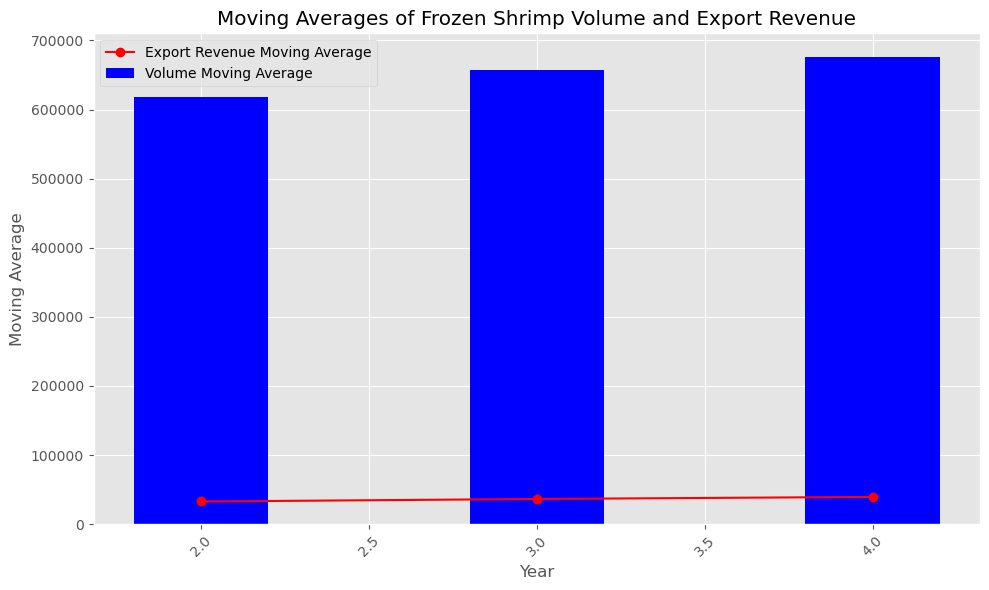

In [166]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_frozen_shrimp, width=0.4, label='Volume Moving Average', color='blue')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_frozen_shrimp, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Frozen Shrimp Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


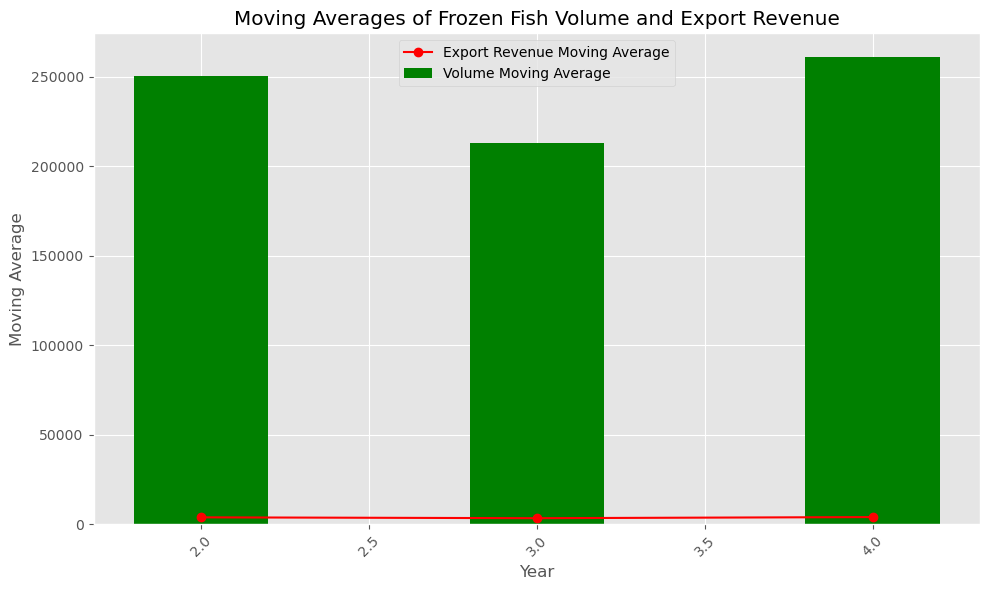

In [167]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_frozen_fish, width=0.4, label='Volume Moving Average', color='green')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_frozen_fish, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Frozen Fish Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

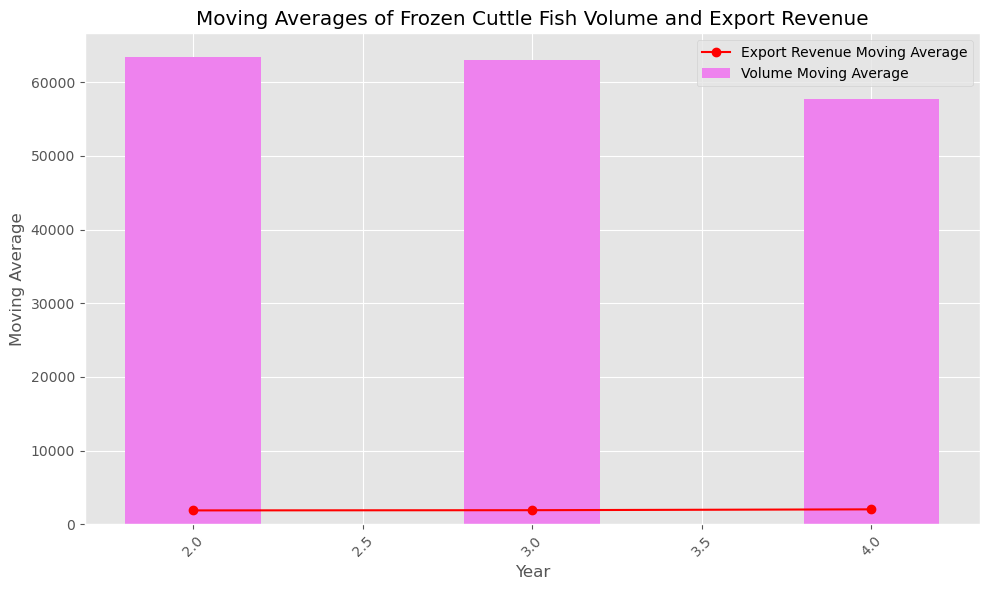

In [168]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_cuttle_fish, width=0.4, label='Volume Moving Average', color='violet')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_cuttle_fish, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Frozen Cuttle Fish Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

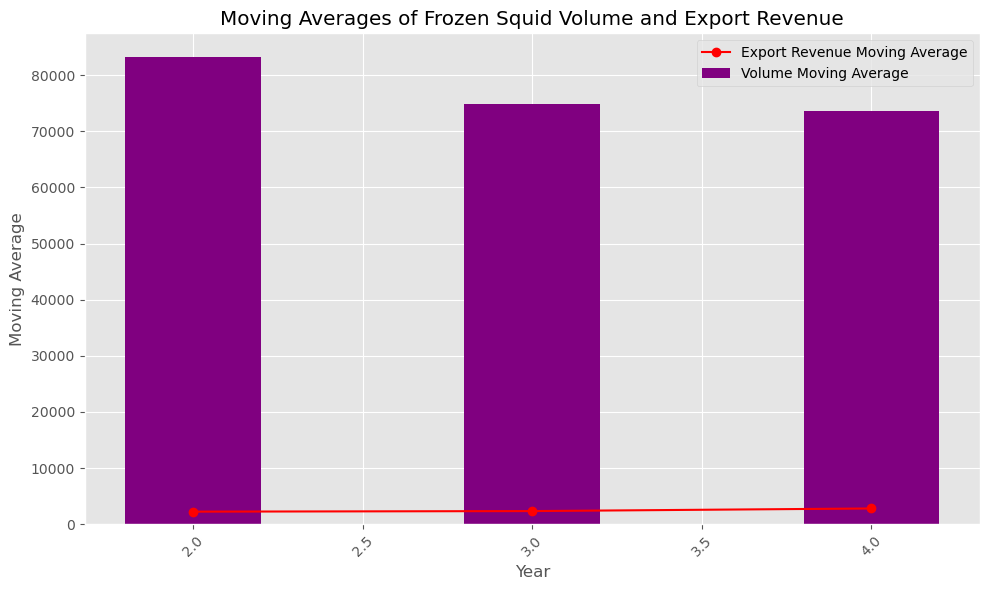

In [90]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_frozen_squid, width=0.4, label='Volume Moving Average', color='purple')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_frozen_squid, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Frozen Squid Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

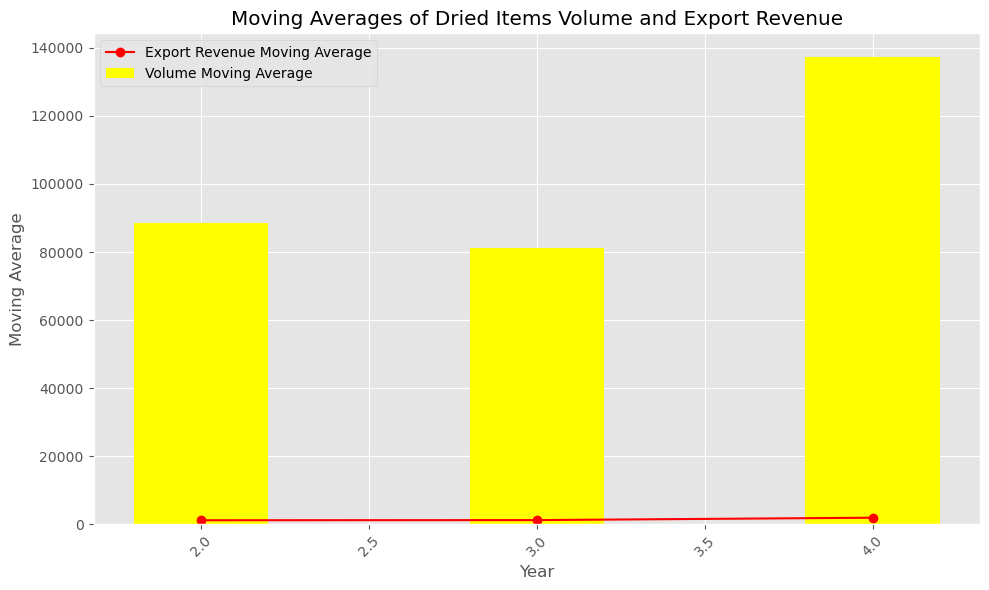

In [91]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_dried_item, width=0.4, label='Volume Moving Average', color='yellow')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_dried_item, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Dried Items Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

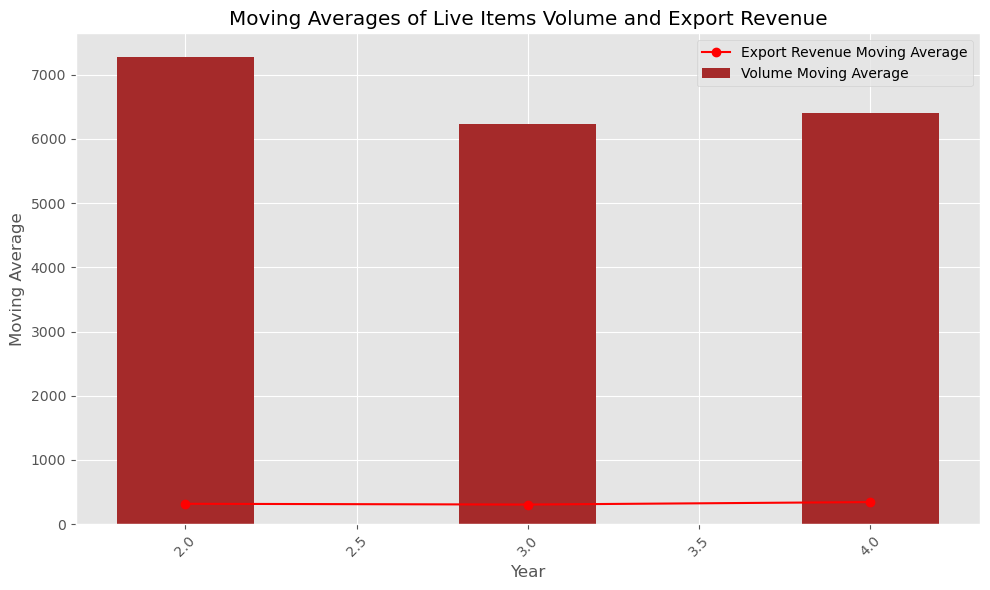

In [92]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_live_items, width=0.4, label='Volume Moving Average', color='brown')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_live_items, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Live Items Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

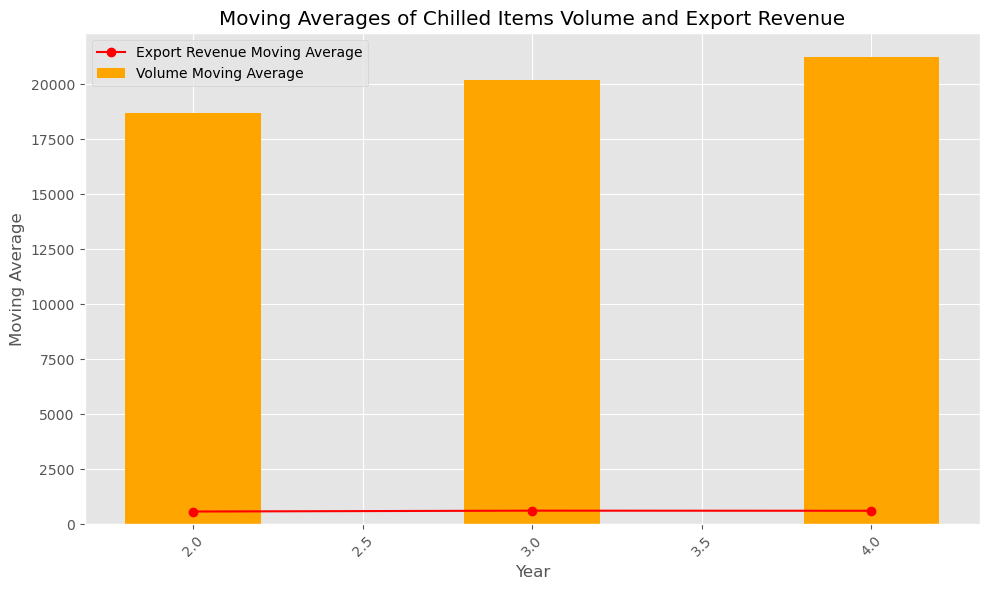

In [93]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_chilled_items, width=0.4, label='Volume Moving Average', color='orange')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_chilled_items, color='red', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Chilled Items Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

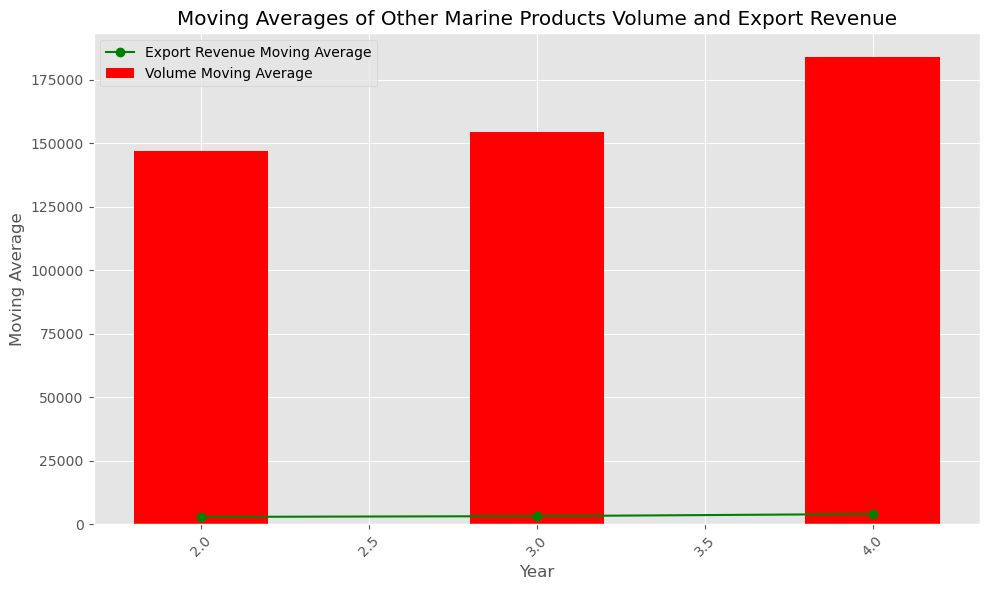

In [94]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume moving average
plt.bar(df.index, Volume_moving_avg_other_marine_products, width=0.4, label='Volume Moving Average', color='red')

# Plot the line graph for Export Revenue moving average
plt.plot(df.index, Export_Revenue_moving_avg_other_marine_products, color='green', marker='o', label='Export Revenue Moving Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Moving Average')
plt.title('Moving Averages of Other Marine Products Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## b) Rolling Averages ---

### 1) Frozen Shrimp

In [26]:
Volume_rolling_avg_frozen_shrimp = df['FROZEN SHRIMP Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_frozen_shrimp = df['FROZEN SHRIMP V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_frozen_fish = df['FROZEN FISH Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_frozen_fish = df['FROZEN FISH V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_cuttle_fish = df['FR CUTTLE FISH Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_cuttle_fish = df['FR CUTTLE FISH V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_frozen_squid = df['FR SQUID Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_frozen_squid = df['FR SQUID FISH V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_dried_item = df['DRIED ITEM Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_dried_item = df['DRIED ITEM V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_live_items = df['LIVE ITEMS Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_live_items = df['LIVE ITEMS V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_chilled_items = df['CHILLED ITEMS Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_chilled_items = df['CHILLED ITEMS V (in Rs. Crore)'].expanding().mean()

Volume_rolling_avg_other_marine_products = df['OTHERS Q (in Million Tonnes)'].expanding().mean()
Export_Revenue_rolling_avg_other_marine_products = df['OTHERS V (in Rs. Crore)'].expanding().mean()

In [171]:
Volume_rolling_avg_frozen_shrimp

0    614145.0
1    633199.0
2    618891.0
3    646199.0
4    659179.0
Name: FROZEN SHRIMP Q (in Million Tonnes), dtype: float64

In [172]:
Export_Revenue_rolling_avg_frozen_shrimp

0    31800.510000
1    32976.270000
2    32824.276667
3    35294.717500
4    36862.890000
Name: FROZEN SHRIMP V (in Rs. Crore), dtype: float64

In [173]:
Volume_rolling_avg_frozen_fish 

0    338933.00
1    281125.50
2    250127.00
3    244241.75
4    269103.20
Name: FROZEN FISH Q (in Million Tonnes), dtype: float64

In [174]:
Export_Revenue_rolling_avg_frozen_fish

0    4916.820000
1    4263.415000
2    3822.826667
3    3735.097500
4    4088.714000
Name: FROZEN FISH V (in Rs. Crore), dtype: float64

In [175]:
Volume_rolling_avg_cuttle_fish

0    60210.000000
1    65558.000000
2    63469.333333
3    62350.000000
4    60863.800000
Name: FR CUTTLE FISH Q (in Million Tonnes), dtype: float64

In [176]:
Export_Revenue_rolling_avg_cuttle_fish

0    1975.9700
1    1992.9700
2    1870.7600
3    1918.7275
4    2005.6500
Name: FR CUTTLE FISH V (in Rs. Crore), dtype: float64

In [177]:
Volume_rolling_avg_frozen_squid

0    101101.000000
1     94366.000000
2     83302.666667
3     81414.500000
4     81900.800000
Name: FR SQUID Q (in Million Tonnes), dtype: float64

In [178]:
Export_Revenue_rolling_avg_frozen_squid

0    2506.9900
1    2351.7900
2    2234.1600
3    2377.1425
4    2620.4640
Name: FR SQUID FISH V (in Rs. Crore), dtype: float64

In [179]:
Volume_rolling_avg_dried_item

0     95296.00
1     89856.50
2     88458.00
3     84763.25
4    118394.20
Name: DRIED ITEM Q (in Million Tonnes), dtype: float64

In [180]:
Export_Revenue_rolling_avg_dried_item

0    1323.4500
1    1152.4750
2    1151.1100
3    1231.5775
4    1601.4460
Name: DRIED ITEM V (in Rs. Crore), dtype: float64

In [181]:
Volume_rolling_avg_live_items

0    10179.000000
1     8733.000000
2     7281.666667
3     7219.250000
4     7340.200000
Name: LIVE ITEMS Q (in Million Tonnes), dtype: float64

In [182]:
Export_Revenue_rolling_avg_live_items 

0    388.8800
1    356.5700
2    317.6100
3    326.5475
4    349.2500
Name: LIVE ITEMS V (in Rs. Crore), dtype: float64

In [183]:
Volume_rolling_avg_chilled_items 

0    17207.0
1    19204.5
2    18677.0
3    19430.0
4    20429.6
Name: CHILLED ITEMS Q (in Million Tonnes), dtype: float64

In [184]:
Export_Revenue_rolling_avg_chilled_items

0    616.220
1    624.030
2    575.350
3    614.880
4    615.162
Name: CHILLED ITEMS V (in Rs. Crore), dtype: float64

In [185]:
Volume_rolling_avg_other_marine_products

0    155487.000000
1    149062.500000
2    147033.333333
3    154628.500000
4    170043.400000
Name: OTHERS Q (in Million Tonnes), dtype: float64

In [186]:
Export_Revenue_rolling_avg_other_marine_products

0    3060.530000
1    2908.685000
2    2861.703333
3    3141.275000
4    3562.226000
Name: OTHERS V (in Rs. Crore), dtype: float64

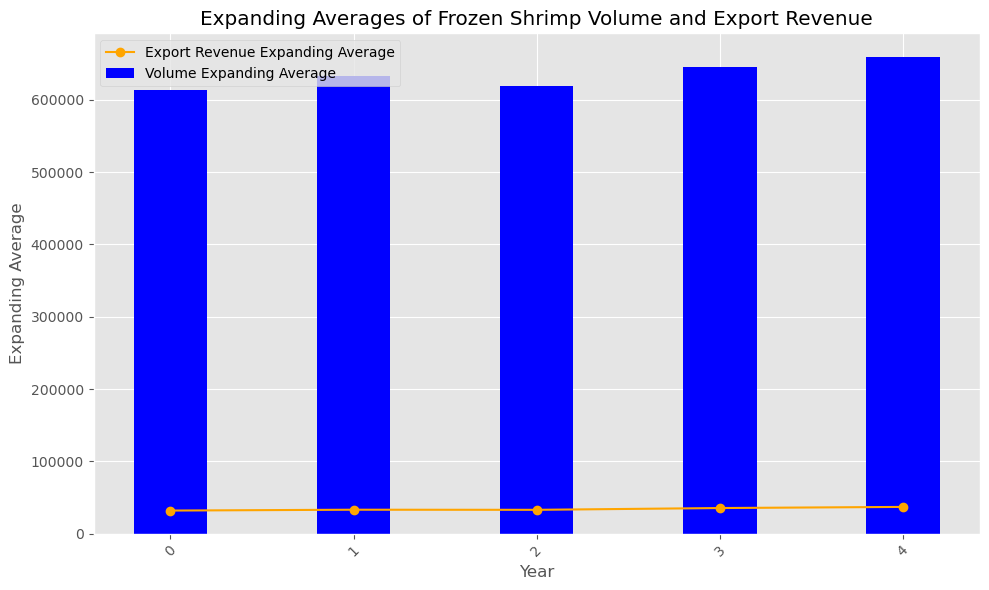

In [187]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_frozen_shrimp, width=0.4, label='Volume Expanding Average', color='blue')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_frozen_shrimp, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Frozen Shrimp Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


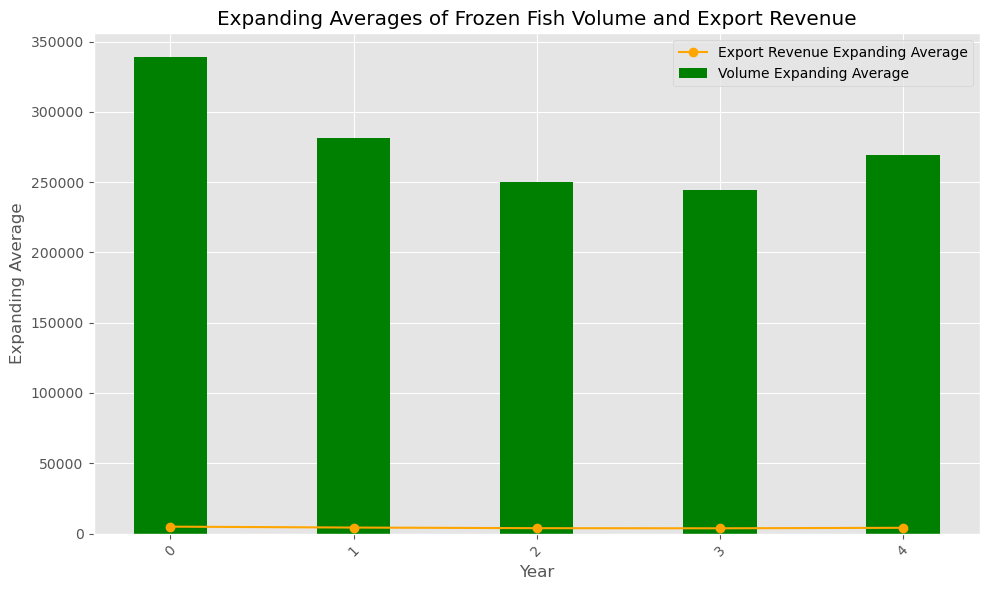

In [188]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_frozen_fish, width=0.4, label='Volume Expanding Average', color='green')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_frozen_fish, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Frozen Fish Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


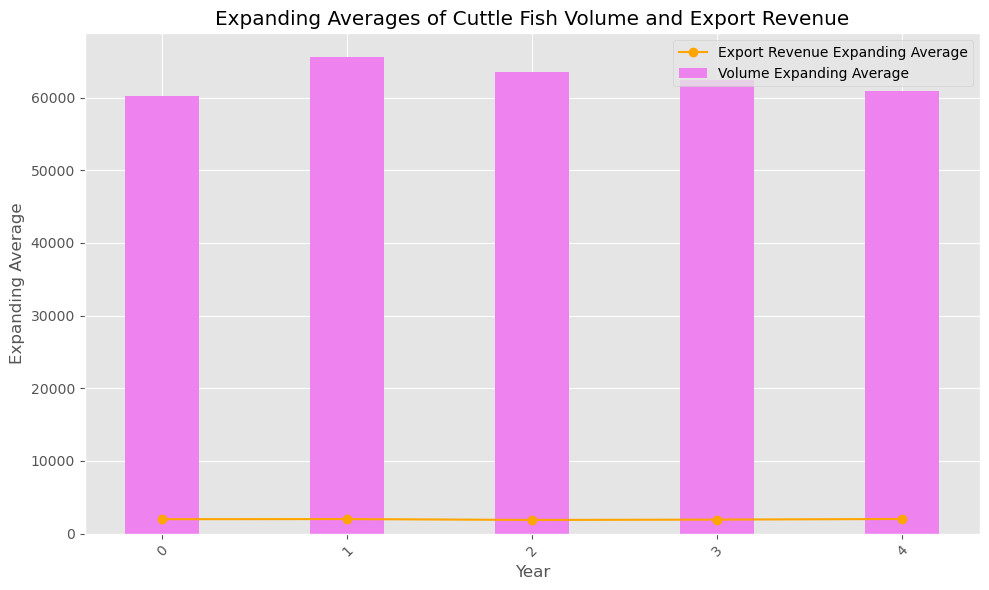

In [96]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_cuttle_fish, width=0.4, label='Volume Expanding Average', color='violet')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_cuttle_fish, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Cuttle Fish Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

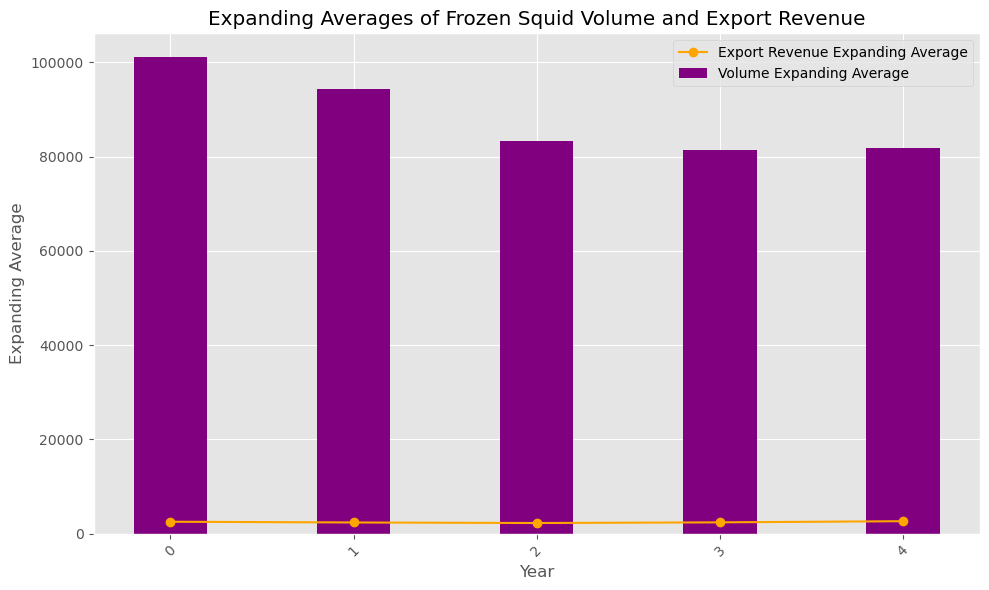

In [99]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_frozen_squid, width=0.4, label='Volume Expanding Average', color='purple')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_frozen_squid, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Frozen Squid Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

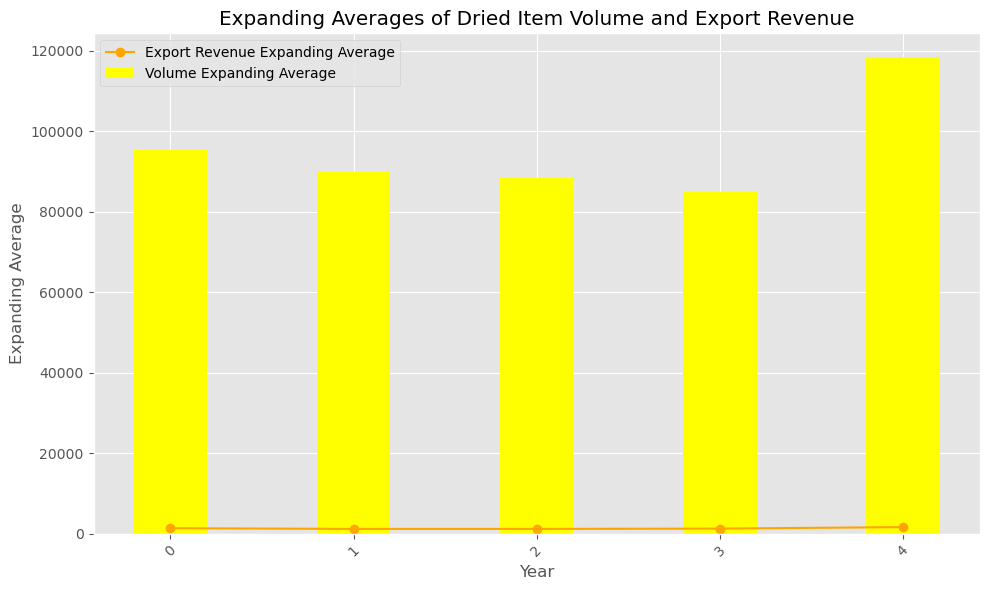

In [98]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_dried_item, width=0.4, label='Volume Expanding Average', color='yellow')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_dried_item, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Dried Item Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

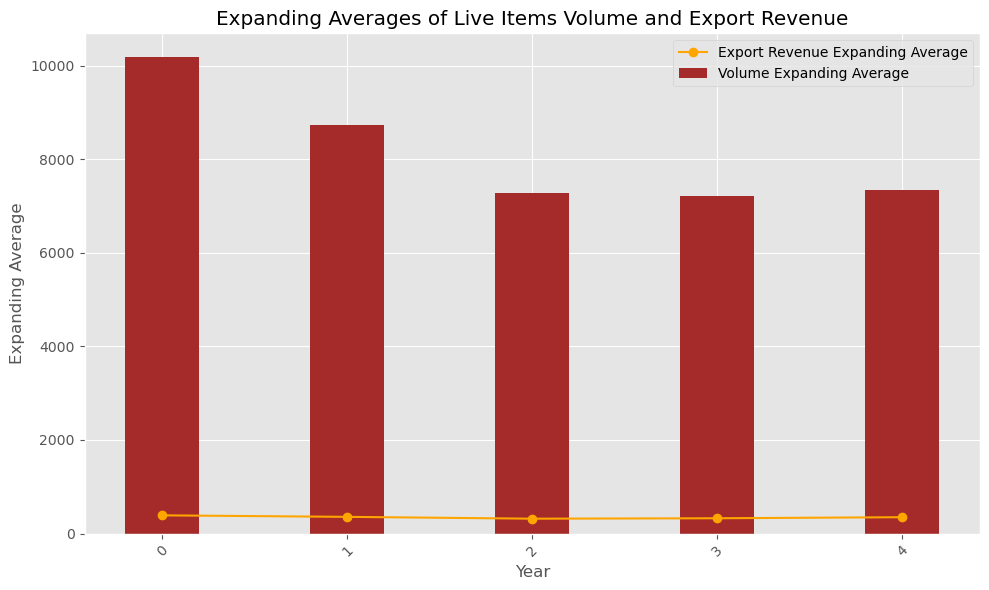

In [102]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_live_items, width=0.4, label='Volume Expanding Average', color='brown')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_live_items, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Live Items Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

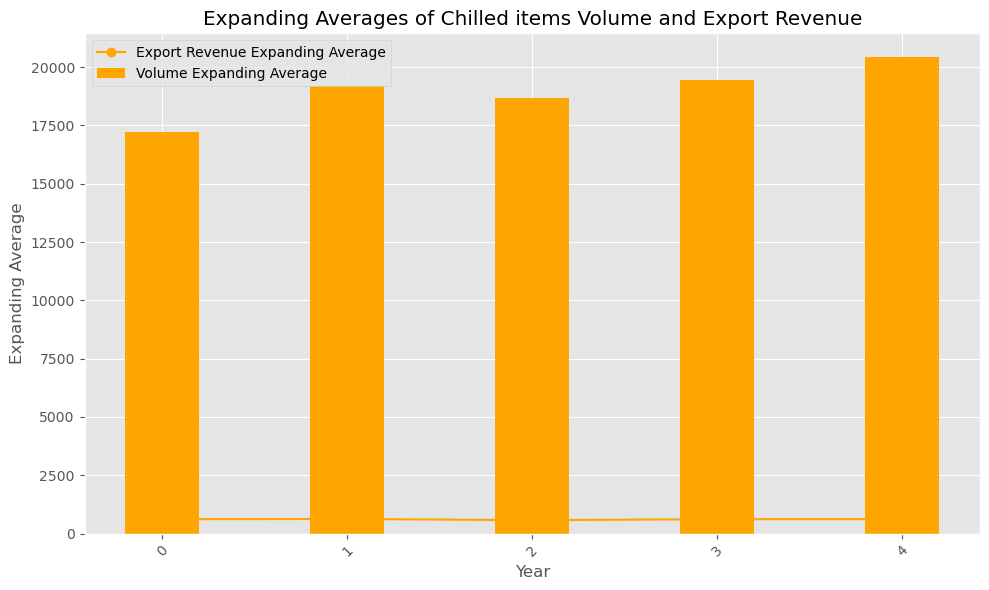

In [103]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_chilled_items, width=0.4, label='Volume Expanding Average', color='Orange')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_chilled_items, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Chilled items Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

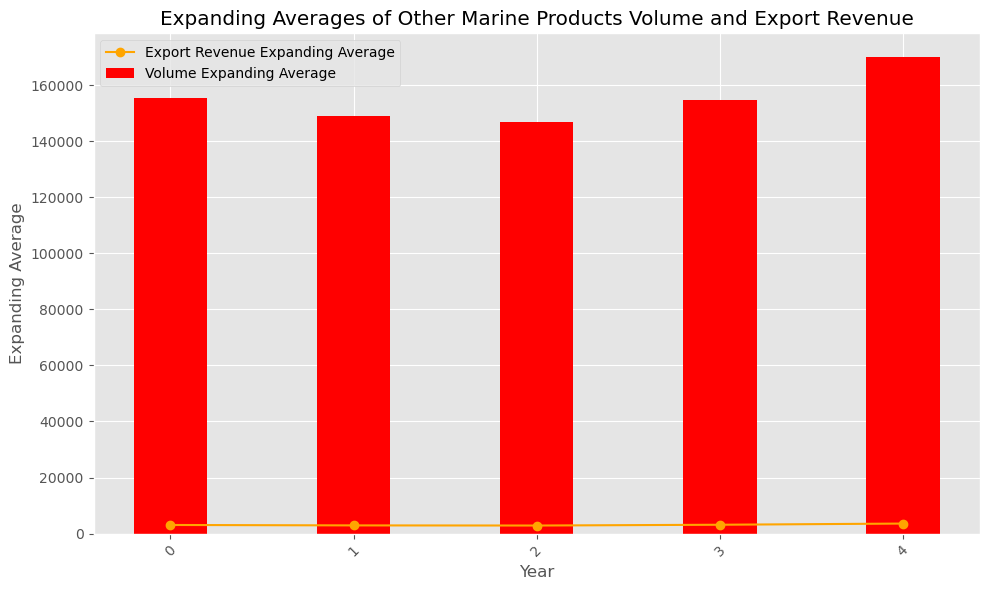

In [105]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar graph for Volume expanding average
plt.bar(df.index, Volume_rolling_avg_other_marine_products, width=0.4, label='Volume Expanding Average', color='red')

# Plot the line graph for Export Revenue expanding average
plt.plot(df.index, Export_Revenue_rolling_avg_other_marine_products, color='orange', marker='o', label='Export Revenue Expanding Average')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Expanding Average')
plt.title('Expanding Averages of Other Marine Products Volume and Export Revenue')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## c) ARIMA (Auto-Regressive Integrated Moving Averages) ---

In [27]:
### 1) Frozen Shrimp---

from statsmodels.tsa.arima.model import ARIMA

# ARIMA
model = ARIMA(df['FROZEN SHRIMP Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_frozen_shrimp = model_fit.forecast(steps=5)
print(ARIMA_forecast_frozen_shrimp)

5    674136.612817
6    710071.460856
7    704058.224582
8    691307.975790
9    702117.095638
Name: predicted_mean, dtype: float64


In [190]:
model = ARIMA(df['FROZEN SHRIMP V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_frozen_shrimp = model_fit.forecast(steps=5)
print(ARIMA_forecast_frozen_shrimp)

5    41654.166049
6    44933.572745
7    45061.380342
8    44280.457585
9    45350.922786
Name: predicted_mean, dtype: float64


In [38]:
model = ARIMA(df['FROZEN FISH Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_frozen_fish = model_fit.forecast(steps=5)
print(ARIMA_forecast_frozen_fish)

5    265815.701166
6    271987.544197
7    311823.538470
8    338559.402519
9    286062.208350
Name: predicted_mean, dtype: float64


In [192]:
model = ARIMA(df['FROZEN FISH V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_frozen_fish = model_fit.forecast(steps=5)
print(ARIMA_forecast_frozen_fish)

5    3208.087603
6    3570.994303
7    4708.170727
8    5476.577253
9    3034.543041
Name: predicted_mean, dtype: float64


In [40]:
model = ARIMA(df['FR CUTTLE FISH Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_cuttle_fish = model_fit.forecast(steps=5)
print(ARIMA_forecast_cuttle_fish)

5    51299.094854
6    53049.385347
7    54067.420230
8    53975.377399
9    54346.622334
Name: predicted_mean, dtype: float64


In [194]:
model = ARIMA(df['FR CUTTLE FISH V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_cuttle_fish = model_fit.forecast(steps=5)
print(ARIMA_forecast_cuttle_fish)

5    1924.396705
6    2135.840650
7    2626.678143
8    2285.033109
9    2236.291716
Name: predicted_mean, dtype: float64


In [42]:
model = ARIMA(df['FR SQUID Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_frozen_squid = model_fit.forecast(steps=5)
print(ARIMA_forecast_frozen_squid)

5    76426.280349
6    75440.176776
7    78669.562486
8    78230.750293
9    77094.856218
Name: predicted_mean, dtype: float64


In [197]:
model = ARIMA(df['FR SQUID FISH V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_frozen_squid = model_fit.forecast(steps=5)
print(ARIMA_forecast_frozen_squid)

5    3377.157589
6    3082.011052
7    3785.930894
8    4661.344491
9    4556.213424
Name: predicted_mean, dtype: float64


In [45]:
model = ARIMA(df['DRIED ITEM Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_dried_item = model_fit.forecast(steps=5)
print(ARIMA_forecast_dried_item)

5    209606.168217
6    215267.308845
7    216850.545844
8    300177.718292
9    261836.439349
Name: predicted_mean, dtype: float64


In [200]:
model = ARIMA(df['DRIED ITEM V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_dried_item = model_fit.forecast(steps=5)
print(ARIMA_forecast_dried_item)

5    4042.073519
6    4784.741501
7    4328.912544
8    4651.943924
9    5230.185509
Name: predicted_mean, dtype: float64


In [48]:
model = ARIMA(df['LIVE ITEMS Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_live_items= model_fit.forecast(steps=5)
print(ARIMA_forecast_live_items)

5     8109.904933
6     4200.152144
7     6331.739663
8    10269.530226
9     5069.267398
Name: predicted_mean, dtype: float64


In [202]:
model = ARIMA(df['LIVE ITEMS V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_live_items = model_fit.forecast(steps=5)
print(ARIMA_forecast_live_items)

5    334.914332
6    302.268189
7    444.143804
8    471.945812
9    352.255481
Name: predicted_mean, dtype: float64


In [49]:
model = ARIMA(df['CHILLED ITEMS Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_chilled_items = model_fit.forecast(steps=5)
print(ARIMA_forecast_chilled_items)

5    14469.572311
6     6985.434136
7     9037.176812
8     5241.413918
9    -2189.400933
Name: predicted_mean, dtype: float64


In [204]:
model = ARIMA(df['CHILLED ITEMS V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_chilled_items = model_fit.forecast(steps=5)
print(ARIMA_forecast_chilled_items)

5    583.208708
6    811.303523
7    609.288215
8    715.532003
9    843.478945
Name: predicted_mean, dtype: float64


In [50]:
model = ARIMA(df['OTHERS Q (in Million Tonnes)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_other_marine_products = model_fit.forecast(steps=5)
print(ARIMA_forecast_other_marine_products)

5    219557.085328
6    229470.058055
7    252733.403505
8    266332.945412
9    262359.754809
Name: predicted_mean, dtype: float64


In [206]:
model = ARIMA(df['OTHERS V (in Rs. Crore)'], order=(5, 1, 0))
model_fit = model.fit()

ARIMA_forecast_other_marine_products = model_fit.forecast(steps=5)
print(ARIMA_forecast_other_marine_products)

5    5326.751560
6    4989.277201
7    5707.784991
8    7167.199518
9    7796.514691
Name: predicted_mean, dtype: float64


# Data Visualization Charts - Moving Average, Rolling Average, ARIMA


### We stall restrict this to Marine Volume related exports only, in order to analyze the perforamnce over the last 5 years 

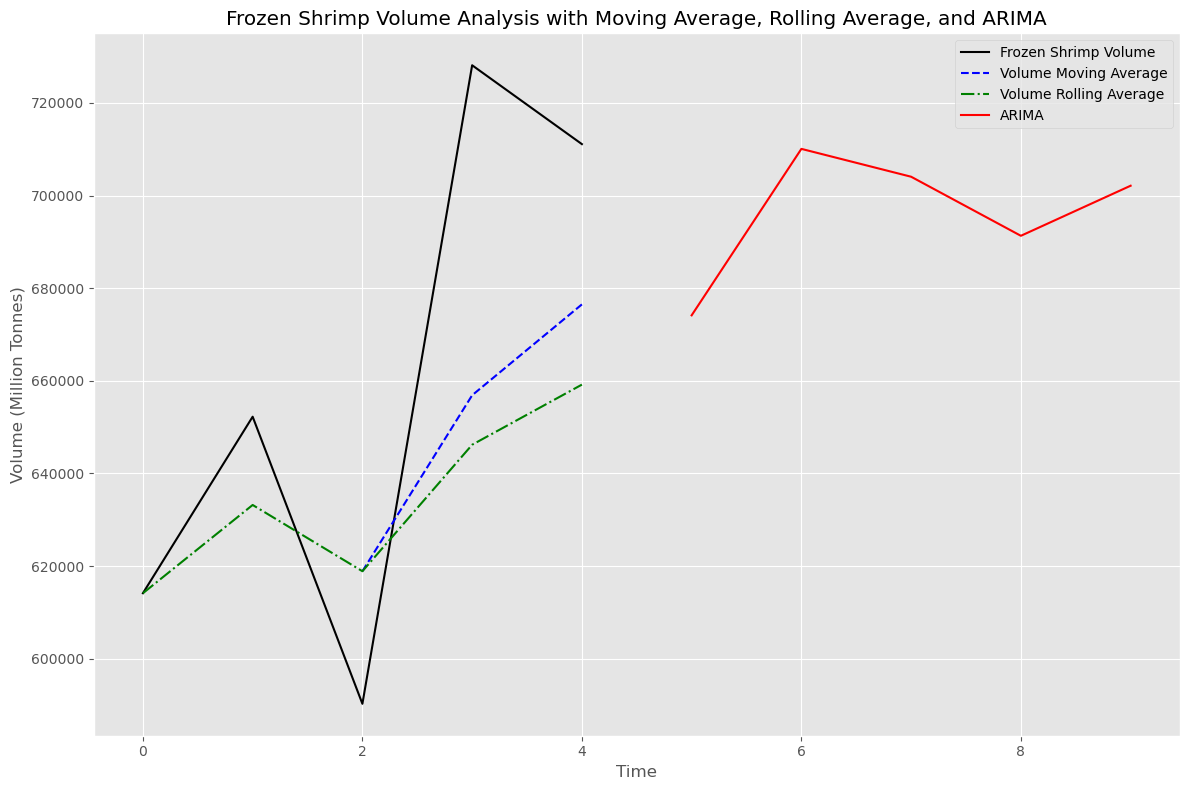

In [35]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['FROZEN SHRIMP Q (in Million Tonnes)'], label='Frozen Shrimp Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_frozen_shrimp, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_frozen_shrimp, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_frozen_shrimp)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Frozen Shrimp Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


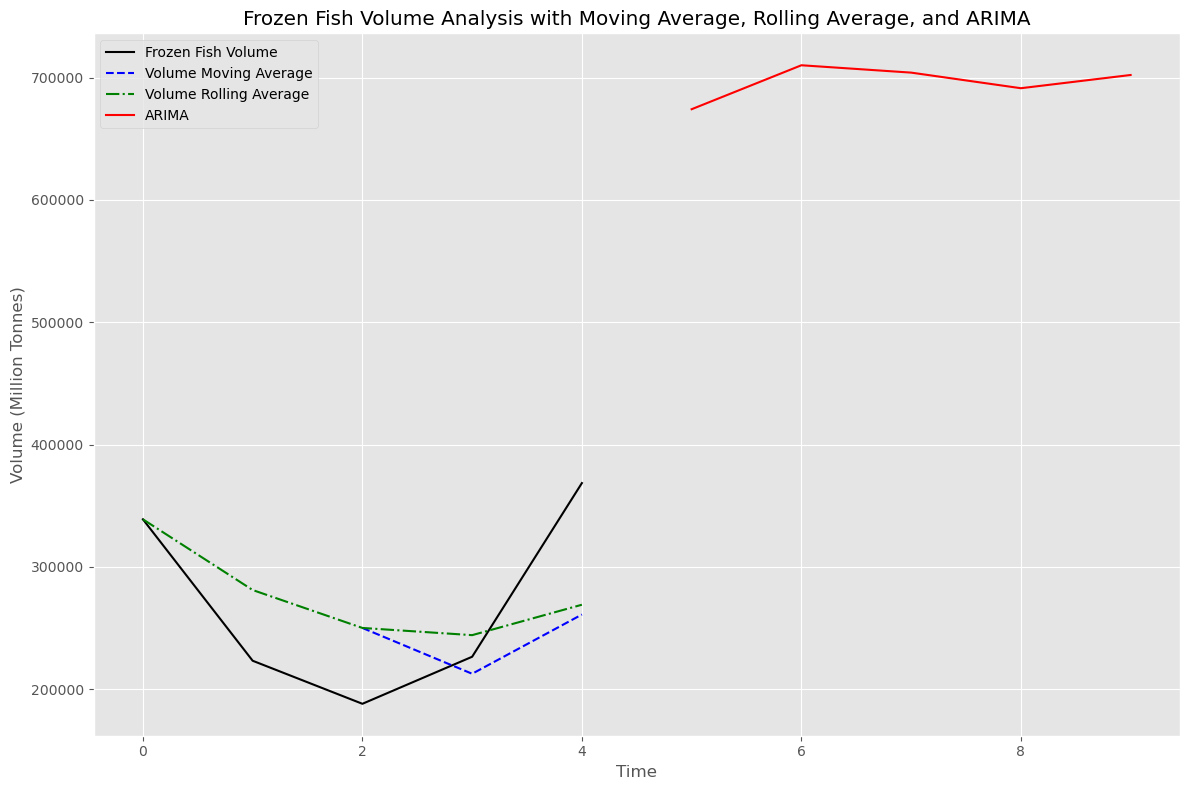

In [39]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['FROZEN FISH Q (in Million Tonnes)'], label='Frozen Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_frozen_fish, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_frozen_fish, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_frozen_fish)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Frozen Fish Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

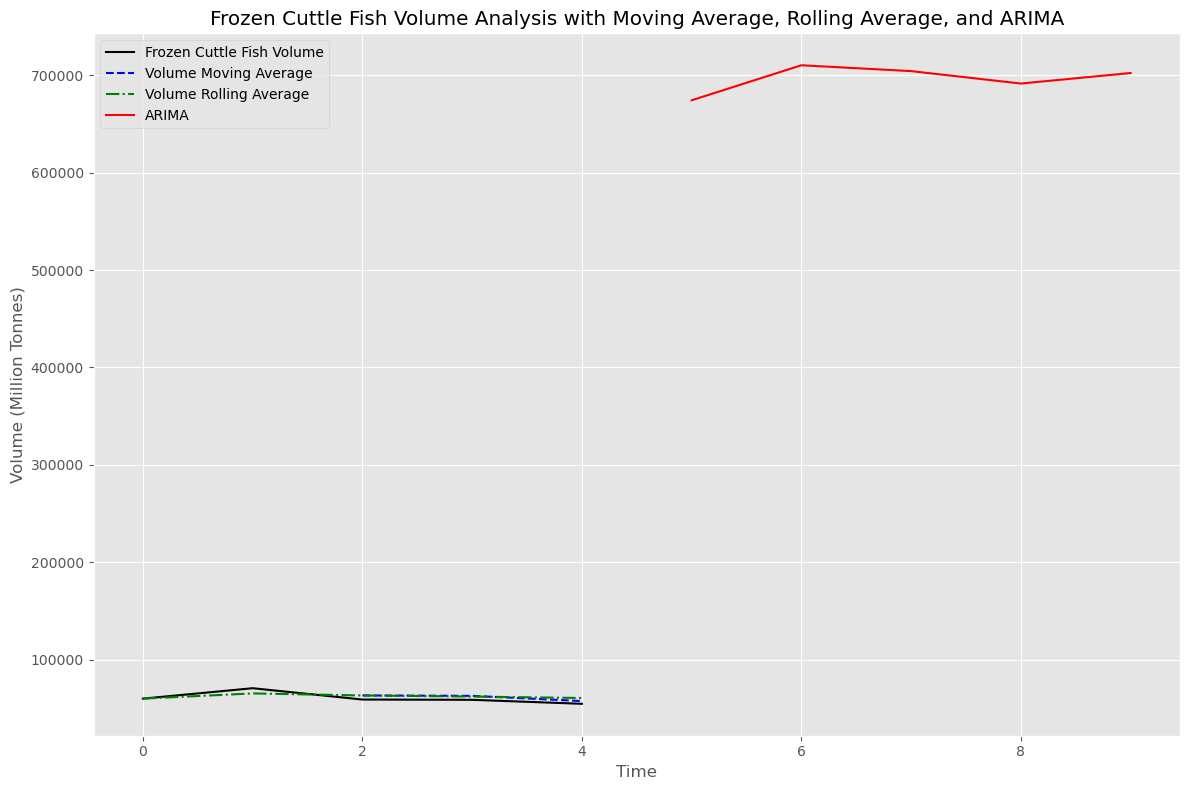

In [44]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['FR CUTTLE FISH Q (in Million Tonnes)'], label='Frozen Cuttle Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_cuttle_fish, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_cuttle_fish, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_cuttle_fish)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Frozen Cuttle Fish Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

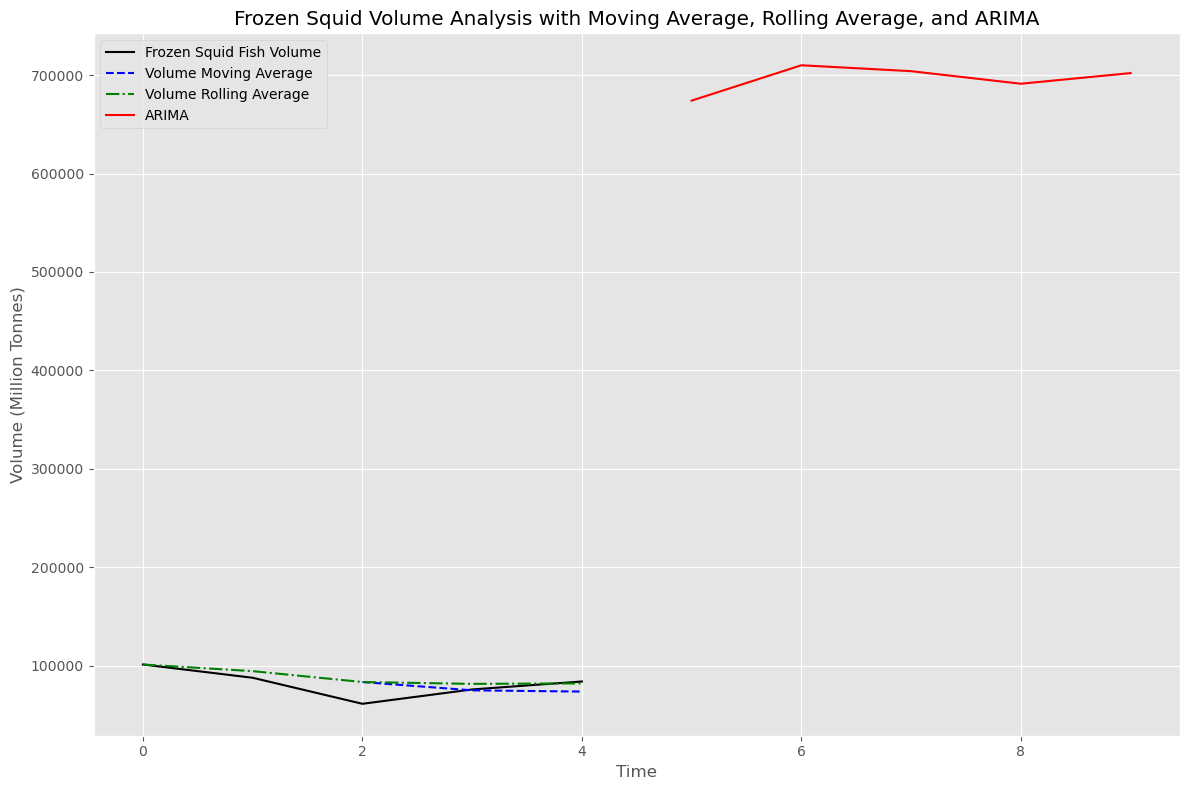

In [43]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['FR SQUID Q (in Million Tonnes)'], label='Frozen Squid Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_frozen_squid, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_frozen_squid, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_frozen_squid)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Frozen Squid Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

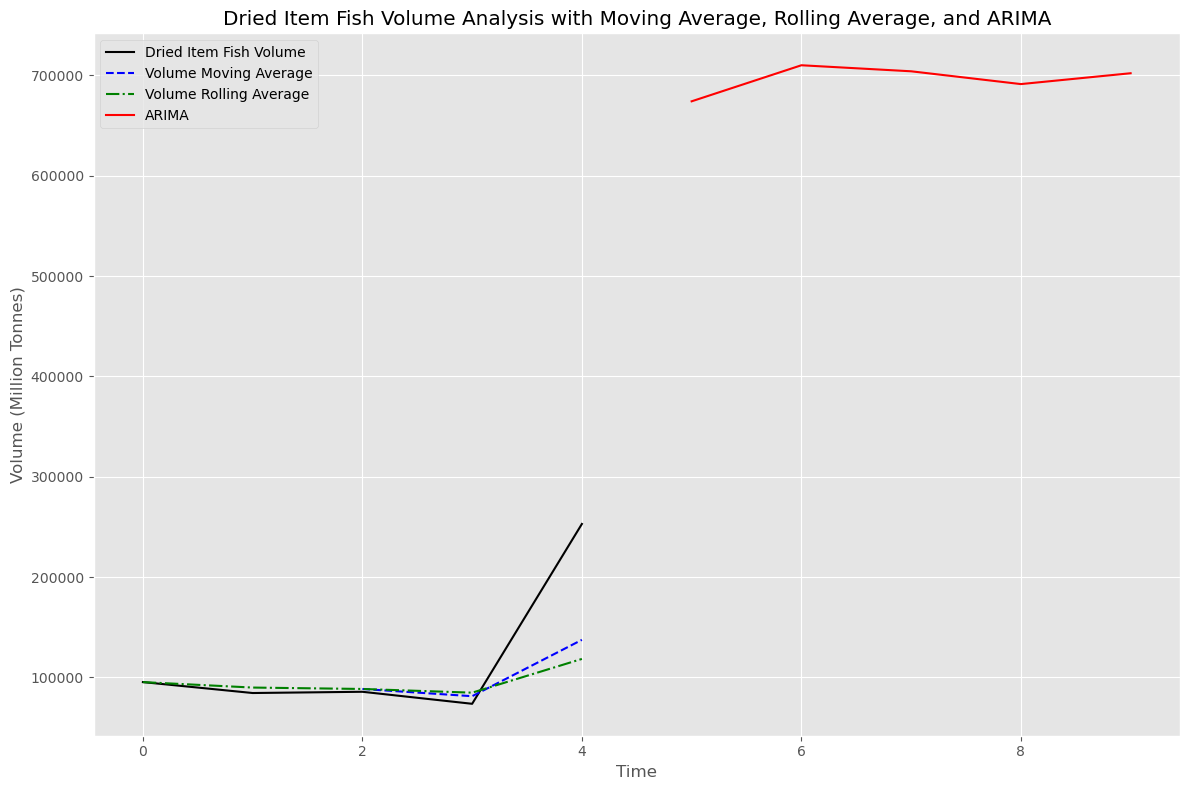

In [47]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['DRIED ITEM Q (in Million Tonnes)'], label='Dried Item Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_dried_item, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_dried_item, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_dried_item)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Dried Item Fish Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

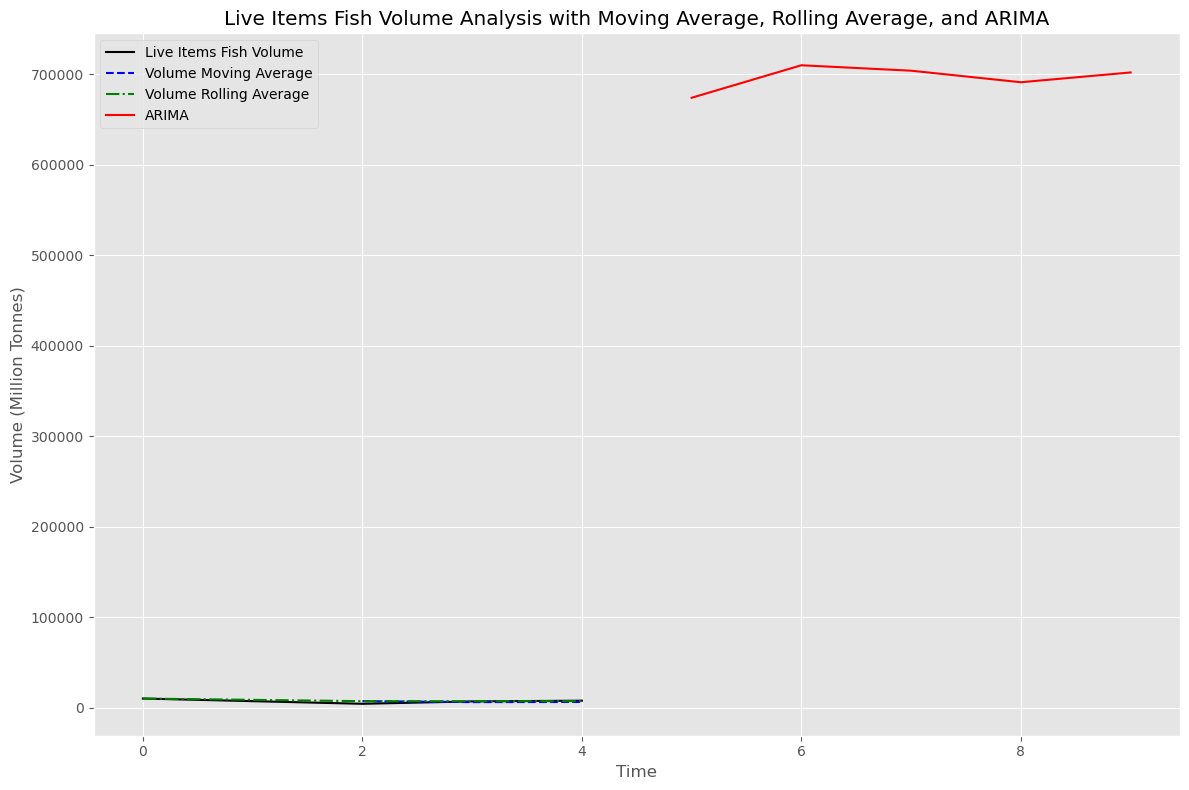

In [51]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['LIVE ITEMS Q (in Million Tonnes)'], label='Live Items Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_live_items, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_live_items, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_live_items)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Live Items Fish Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

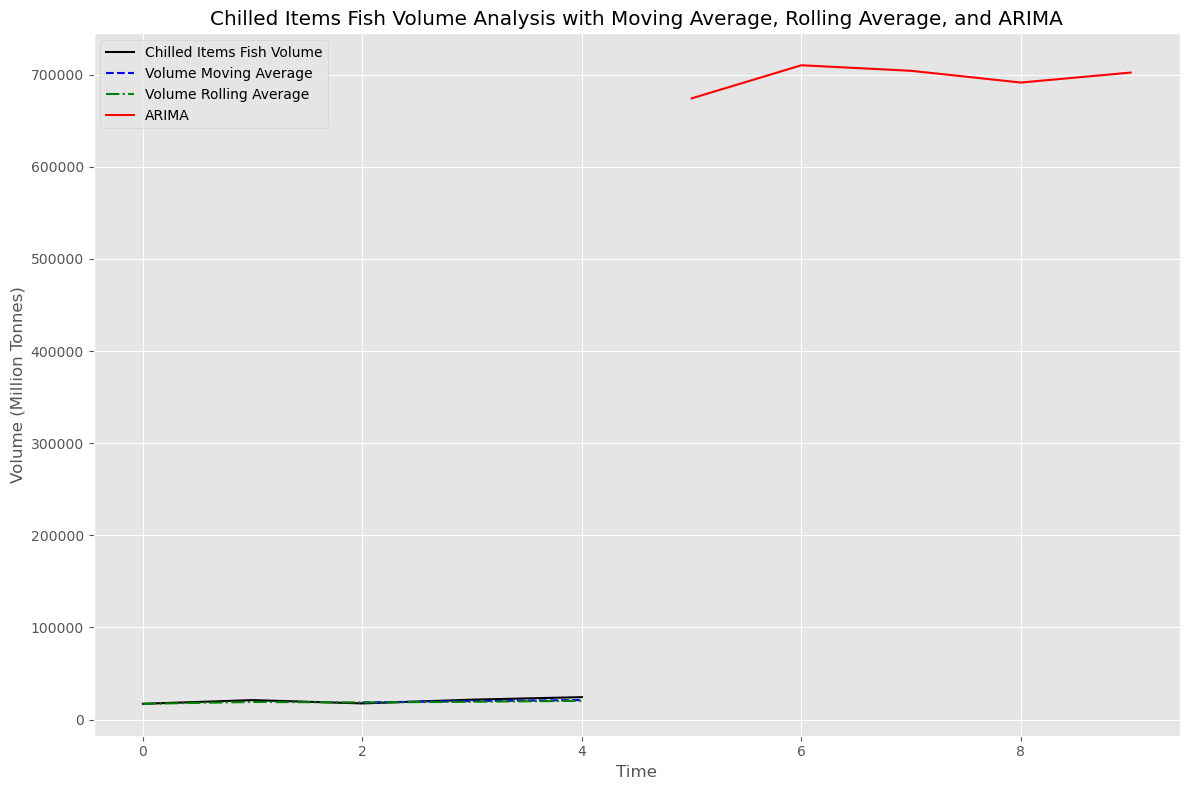

In [52]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['CHILLED ITEMS Q (in Million Tonnes)'], label='Chilled Items Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_chilled_items, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_chilled_items, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_chilled_items)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Chilled Items Fish Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

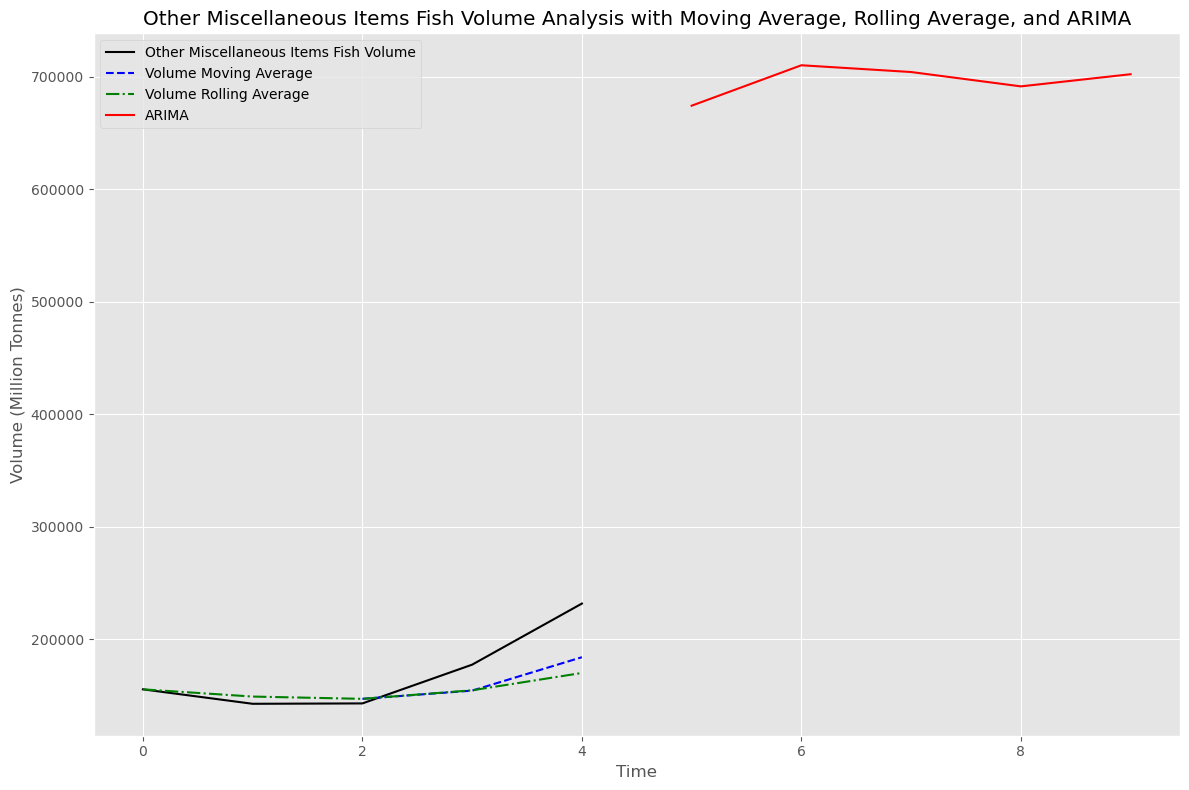

In [53]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the Frozen Shrimp Volume
plt.plot(df.index, df['OTHERS Q (in Million Tonnes)'], label='Other Miscellaneous Items Fish Volume', color='black')

# Plot Moving Average
plt.plot(df.index, Volume_moving_avg_other_marine_products, label='Volume Moving Average', color='blue', linestyle='--')

# Plot Rolling Average
plt.plot(df.index, Volume_rolling_avg_other_marine_products, label='Volume Rolling Average', color='green', linestyle='-.')

# Plot ARIMA Forecast
plt.plot(range(len(df), len(df) + len(ARIMA_forecast_other_marine_products)), ARIMA_forecast_frozen_shrimp, label='ARIMA', color='red')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Volume (Million Tonnes)')
plt.title('Other Miscellaneous Items Fish Volume Analysis with Moving Average, Rolling Average, and ARIMA')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Using Prophet Package ---

In [13]:
from prophet import Prophet
import pandas as pd

# Replace 'data' with the appropriate DataFrame containing your dataset
forecast_data = df[['Item', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']]
forecast_data = forecast_data.melt(id_vars='Item', var_name='Year', value_name='Value')
forecast_data['Year'] = forecast_data['Year'].apply(lambda x: x[-2:])  # Extract the last two digits of the year

# Rename the columns for Prophet
forecast_data = forecast_data.rename(columns={'Item': 'item', 'Year': 'ds', 'Value': 'y'})

# Convert 'ds' column to datetime format
forecast_data['ds'] = pd.to_datetime(forecast_data['ds'], format='%y')  # Adjust the format as per your requirement

In [16]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(forecast_data)

# Create future dates for forecasting (next 3 years)
future_dates = model.make_future_dataframe(periods=3*12, freq='M')  # Adjust the frequency and periods as per your requirement

cmd: where.exe tbb.dll
cwd: None
TBB already found in load path
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
input tempfile: C:\Users\lenovo\AppData\Local\Temp\tmp28q385zb\hc3snsnz.json
input tempfile: C:\Users\lenovo\AppData\Local\Temp\tmp28q385zb\ejvarb7d.json
idx 0
running CmdStan, num_threads: None
CmdStan args: ['E:\\Anaconda\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=46749', 'data', 'file=C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmp28q385zb\\hc3snsnz.json', 'init=C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmp28q385zb\\ejvarb7d.json', 'output', 'file=C:\\Users\\lenovo\\AppData\\Local\\Temp\\tmp28q385zb\\prophet_modelfhw5k4zi\\prophet_model-20240414203952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:39:52 - cmdstanpy - INFO - Chain [1] start processing
Chain [1] start processing
20:39:52 - cmdstanpy - INF

In [17]:
# Perform forecasting
forecast = model.predict(future_dates)
forecast

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0  2019-01-01  561884.509747 -130946.605977  238113.304774  561884.509747   
1  2020-01-01  566668.619199 -130409.845141  245393.254078  566668.619199   
2  2021-01-01  571465.832347 -125389.047123  240448.299500  571465.832347   
3  2022-01-01  576249.938480 -113755.979547  256860.482482  576249.938480   
4  2023-01-01  581034.043737 -110902.050288  248981.614144  581034.043737   
5  2023-01-31  581427.257867  503508.368408  872194.513879  581427.257778   
6  2023-02-28  581794.257723  475892.017944  842754.711846  581794.257434   
7  2023-03-31  582200.578991  438716.843836  797767.218175  582200.578416   
8  2023-04-30  582593.793122  405524.033334  771294.428667  582593.792185   
9  2023-05-31  583000.114390  400350.966349  769244.509340  583000.113068   
10 2023-06-30  583393.328521  400901.839542  766353.317790  583393.326797   
11 2023-07-31  583799.649789  417441.686822  804556.497101  583799.647621   
12 2023-08-31  584205.971057  443621.445773  811659.330251  584205.968352   
13 2023-09-30  584599.185188  465278.724149  834917.204194  584599.181911   
14 2023-10-31  585005.506456  485734.189171  856619.480816  585005.502593   
15 2023-11-30  585398.720587  456746.885825  823886.938930  585398.716144   
16 2023-12-31  585805.041855  -90867.095736  269110.525087  585805.036603   
17 2024-01-31  586211.363124  495336.360474  879722.686820  586211.357178   
18 2024-02-29  586591.470117  474828.578109  838697.312448  586591.463562   
19 2024-03-31  586997.791385  433940.666868  820810.985511  586997.784142   
20 2024-04-30  587391.005516  423254.163426  782198.947654  587390.997433   
21 2024-05-31  587797.326784  409965.654563  769085.494621  587797.317977   
22 2024-06-30  588190.540915  400033.812358  774594.451538  588190.531458   
23 2024-07-31  588596.862183  405031.545065  803183.287163  588596.851872   
24 2024-08-31  589003.183451  427935.961934  807512.244172  589003.172275   
25 2024-09-30  589396.397582  458475.693813  820177.042411  589396.385692   
26 2024-10-31  589802.718850  472264.396276  840133.460233  589802.706138   
27 2024-11-30  590195.932981  476953.528118  846966.324139  590195.919390   
28 2024-12-31  590602.254249 -112606.361107  256034.339508  590602.240211   
29 2025-01-31  591008.575518  514604.773379  883305.427549  591008.560417   
30 2025-02-28  591375.575373  478412.184731  857907.536566  591375.559093   
31 2025-03-31  591781.896641  450581.755679  837634.138248  591781.879419   
32 2025-04-30  592175.110772  414508.598538  785170.064699  592175.092705   
33 2025-05-31  592581.432040  422980.771416  776620.637253  592581.413193   
34 2025-06-30  592974.646171  408007.182344  787230.772093  592974.626017   
35 2025-07-31  593380.967439  433927.097984  795037.495048  593380.946078   
36 2025-08-31  593787.288708  437393.840132  805270.811954  593787.266439   
37 2025-09-30  594180.502838  462933.401721  829764.383052  594180.479258   
38 2025-10-31  594586.824107  465213.549973  856232.036196  594586.798971   
39 2025-11-30  594980.038237  458363.348976  840983.696154  594980.011827   
40 2025-12-31  595386.359506  -97012.448949  276135.138595  595386.331819   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   561884.509747  -509470.388557        -509470.388557        -509470.388557   
1   566668.619199  -508509.108822        -508509.108822        -508509.108822   
2   571465.832347  -510308.423010        -510308.423010        -510308.423010   
3   576249.938480  -510070.403319        -510070.403319        -510070.403319   
4   581034.043737  -509470.388557        -509470.388557        -509470.388557   
5   581427.257961   108828.000199         108828.000199         108828.000199   
6   581794.258031    69112.160172          69112.160172          69112.160172   
7   582200.579603    35373.207532          35373.207532          35373.207532   
8   582593.794103     8945.460791           894

In [18]:
# Print the forecasted values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(36)  # Print the last 36 rows for the next 3 years

ds           yhat     yhat_lower     yhat_upper
5  2023-01-31  690255.258066  503508.368408  872194.513879
6  2023-02-28  650906.417894  475892.017944  842754.711846
7  2023-03-31  617573.786523  438716.843836  797767.218175
8  2023-04-30  591539.253913  405524.033334  771294.428667
9  2023-05-31  583347.806686  400350.966349  769244.509340
10 2023-06-30  587712.030271  400901.839542  766353.317790
11 2023-07-31  601334.682714  417441.686822  804556.497101
12 2023-08-31  620243.051564  443621.445773  811659.330251
13 2023-09-30  643296.939174  465278.724149  834917.204194
14 2023-10-31  656982.832521  485734.189171  856619.480816
15 2023-11-30  643442.073766  456746.885825  823886.938930
16 2023-12-31   84723.782062  -90867.095736  269110.525087
17 2024-01-31  698270.338520  495336.360474  879722.686820
18 2024-02-29  658932.544812  474828.578109  838697.312448
19 2024-03-31  626967.656173  433940.666868  820810.985511
20 2024-04-30  599867.416550  423254.163426  782198.947654
21 2024-05-31  589448.128257  409965.654563  769085.494621
22 2024-06-30  590856.056824  400033.812358  774594.451538
23 2024-07-31  602840.906220  405031.545065  803183.287163
24 2024-08-31  621320.611806  427935.961934  807512.244172
25 2024-09-30  646411.642365  458475.693813  820177.042411
26 2024-10-31  664125.369089  472264.396276  840133.460233
27 2024-11-30  660431.573502  476953.528118  846966.324139
28 2024-12-31   83414.521248 -112606.361107  256034.339508
29 2025-01-31  693038.513413  514604.773379  883305.427549
30 2025-02-28  662741.103543  478412.184731  857907.536566
31 2025-03-31  630251.499683  450581.755679  837634.138248
32 2025-04-30  603447.657025  414508.598538  785170.064699
33 2025-05-31  593748.374607  422980.771416  776620.637253
34 2025-06-30  596145.874754  408007.182344  787230.772093
35 2025-07-31  608702.969273  433927.097984  795037.495048
36 2025-08-31  627364.620496  437393.840132  805270.811954
37 2025-09-30  651824.495907  462933.401721  829764.383052
38 2025-10-31  668219.327892  465213.549973  856232.036196
39 2025-11-30  661170.251180  458363.348976  840983.696154
40 2025-12-31   89878.492429  -97012.448949  276135.138595

# Event Study---

## Using Statsmodel library ---

### Year 2020-21 & 2020-21 are taken as Covid years with Lockdown (Eventful years) impacting  various sectors across Indian Economy 
### Eventful Years are represented as 1
### Non-eventful years are represented as 0

In [19]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the data from the CSV file
data = pd.read_csv('Item-wise Export of Marine Products_2018-2023.csv')

# Convert the 'Measurable Quantum Parameters' column to a categorical data type
data['Measurable Quantum Parameters'] = data['Measurable Quantum Parameters'].astype('category')

# Get the column names for the years
year_columns = [col for col in data.columns if col not in ['Item', 'Measurable Quantum Parameters']]

# Reshape the data into a long format suitable for analysis
melted_data = pd.melt(data, id_vars=['Item', 'Measurable Quantum Parameters'], value_vars=year_columns, var_name='Year', value_name='Value')

# Add a new column to indicate if the year falls within the event period (2020-21 & 2021-22)
melted_data['Event'] = 0
melted_data.loc[melted_data['Year'].isin(['2020-21', '2021-22']), 'Event'] = 1

# Define the formula for the regression model with the event variable
formula = 'Value ~ C(Item) + C(Year) + C(Item):C(Year) + Event'

# Fit the OLS regression model
model = ols(formula, data=melted_data).fit()
model

In [20]:
# Extract relevant information from the model summary
results = model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                    0.7079
Date:                Sun, 14 Apr 2024   Prob (F-statistic):              0.882
Time:                        20:59:16   Log-Likelihood:                -1576.7
No. Observations:                 120   AIC:                             3233.
Df Residuals:                      80   BIC:                             3345.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     5970.8067    8.7e+04      0.069      0.945   -1.67e+05    1.79e+05
C(Item)[T.DRIED ITEM]                          2.63e+04   1.23e+05      0.214      0.831   -2.19e+05    2.71e+05
C(Item)[T.FR CUTTLE FISH]                     1.485e+04   1.23e+05      0.121      0.904    -2.3e+05     2.6e+05
C(Item)[T.FR SQUID]                           2.869e+04   1.23e+05      0.233      0.816   -2.16e+05    2.74e+05
C(Item)[T.FROZEN FISH]                        1.089e+05   1.23e+05      0.885      0.379   -1.36e+05    3.54e+05
C(Item)[T.FROZEN SHRIMP]                      2.109e+05   1.23e+05      1.714      0.090    -3.4e+04    4.56e+05
C(Item)[T.LIVE ITEMS]                        -2429.5500   1.23e+05     -0.020      0.984   -2.47e+05    2.42e+05
C(Item)[T.OTHERS]                             4.703e+04   1.23e+05      0.382      0.703   -1.98e+05    2.92e+05
C(Year)[T.2019-20]                            1337.2533   1.23e+05      0.011      0.991   -2.44e+05    2.46e+05
C(Year)[T.2020-21]                            -452.0611    7.1e+04     -0.006      0.995   -1.42e+05    1.41e+05
C(Year)[T.2021-22]                             988.3589    7.1e+04      0.014      0.989    -1.4e+05    1.42e+05
C(Year)[T.2022-23]                            2403.0133   1.23e+05      0.020      0.984   -2.42e+05    2.47e+05
C(Item)[T.DRIED ITEM]:C(Year)[T.2019-20]     -5093.8267   1.74e+05     -0.029      0.977   -3.51e+05    3.41e+05
C(Item)[T.FR CUTTLE FISH]:C(Year)[T.2019-20]  2240.7233   1.74e+05      0.013      0.990   -3.44e+05    3.49e+05
C(Item)[T.FR SQUID]:C(Year)[T.2019-20]       -5945.8800   1.74e+05     -0.034      0.973   -3.52e+05     3.4e+05
C(Item)[T.FROZEN FISH]:C(Year)[T.2019-20]    -4.037e+04   1.74e+05     -0.232      0.817   -3.87e+05    3.06e+05
C(Item)[T.FROZEN SHRIMP]:C(Year)[T.2019-20]   1.224e+04   1.74e+05      0.070      0.944   -3.34e+05    3.59e+05
C(Item)[T.LIVE ITEMS]:C(Year)[T.2019-20]     -2325.9467   1.74e+05     -0.013      0.989   -3.49e+05    3.44e+05
C(Item)[T.OTHERS]:C(Year)[T.2019-20]         -5736.2800   1.74e+05     -0.033      0.974   -3.52e+05    3.41e+05
C(Item)[T.DRIED ITEM]:C(Year)[T.2020-21]     -3365.1400   1.74e+05     -0.019      0.985    -3.5e+05    3.43e+05
C(Item)[T.FR CUTTLE FISH]:C(Year)[T.2020-21]  -526.8867   1.74e+05     -0.003      0.998   -3.47e+05    3.46e+05
C(Item)[T.FR SQUID]:C(Year)[T.2020-21]       -1.359e+04   1.74e+05     -0.078      0.938    -3.6e+05    3.33e+05
C(Item)[T.FROZEN FISH]:C(Year)[T.2020-21]    -5.111e+04   1.74e+05     -0.294      0.770   -3.97e+05    2.95e+05
C(Item)[T.FROZEN SHRIMP]:C(Year)[T.2020-21]  -7862.4433   1.74e+05     -0.045      0.964   -3.54e+05    3.38e+05
C(Item)[T.LIVE ITEMS]:C(Year)[T.

In [51]:
# Export the merged DataFrame to a CSV file
merged_data.to_csv('merged_data_with_Event_Study_Results.csv', index=False)

# Coefficient Plot

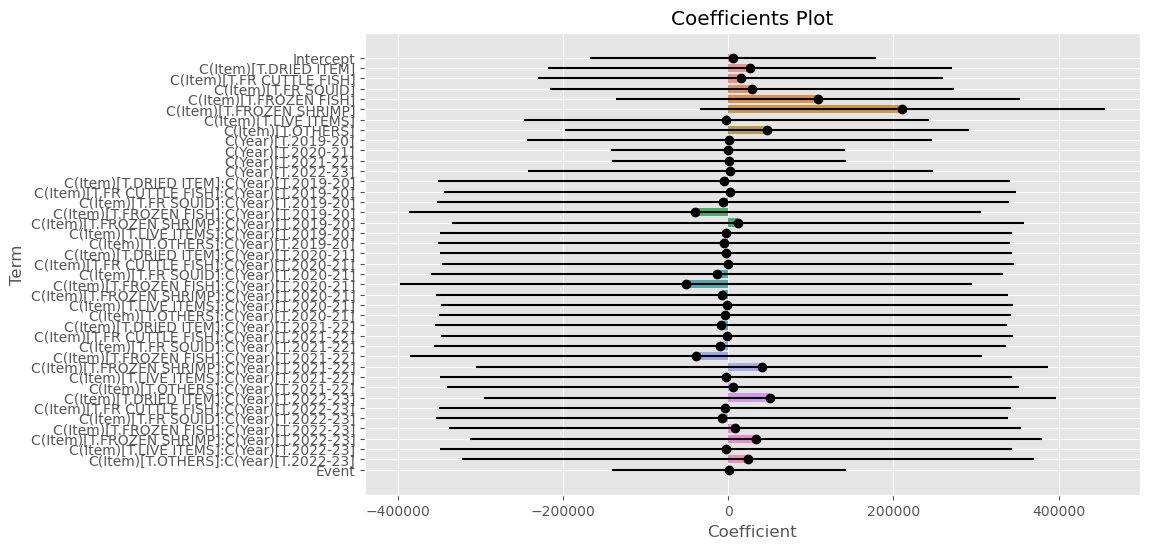

In [21]:
# Get coefficients and confidence intervals
coef_df = model.conf_int().reset_index()
coef_df.columns = ['Term', 'Lower_CI', 'Upper_CI']
coef_df['Coefficient'] = model.params.values

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Term', data=coef_df, ci=None)
plt.errorbar(x=coef_df['Coefficient'], y=coef_df['Term'], xerr=[coef_df['Coefficient'] - coef_df['Lower_CI'], coef_df['Upper_CI'] - coef_df['Coefficient']], fmt='o', color='black')
plt.xlabel('Coefficient')
plt.ylabel('Term')
plt.title('Coefficients Plot')
plt.grid(True)
plt.show()


# Residual Plot

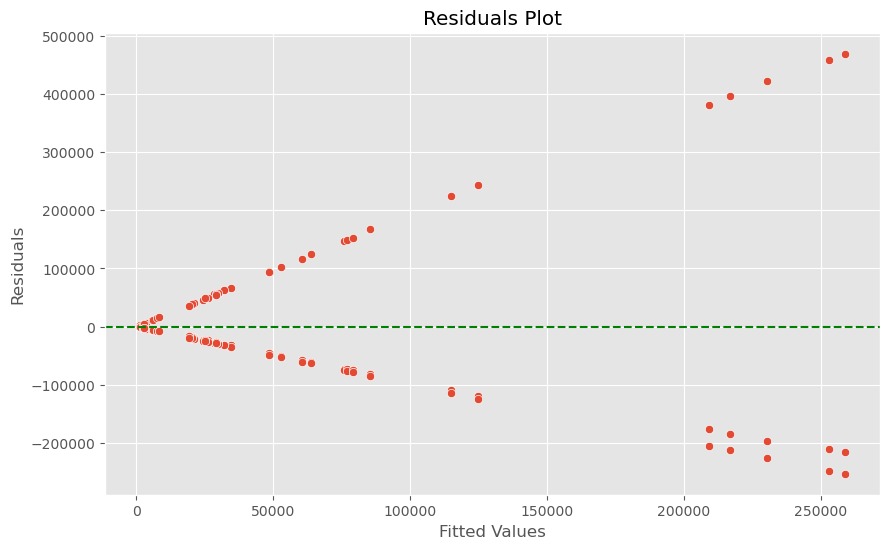

In [23]:
# Get residuals
residuals = model.resid

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='g', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()
